## Final Project: Prudential Life Insurance Assessment
Author: Yuman Lin  
CFRM 521 Machine Learing for finance, final project.  
Competition in Kaggle: Can you make buying life insurance easier?    
Kaggle link: https://www.kaggle.com/c/prudential-life-insurance-assessment  

## Project Introduction  

The insurance industry has always relied on data to calculate risk and come up with personalized ratings. Today, the main applications of machine learning in the insurance industry include market monitoring analysis, AI Assistant to respond to internal agents, customer data processing and policy analysis.   
   
A popular application in insurance industry is life insurance application process. Customers provide extensive information to identify risk classification and eligibility, including scheduling medical exams, a process that takes an average of 30 days.   

The competition aims to make it quicker and less labor intensive for new and existing customers to get a quote while maintaining privacy boundaries. Given personal information of one client, the model tries to accurately classify risk using a more automated approach and predict suitable insurance product for every client.    

The competition provides over a hundred variables describing attributes of life insurance applicants. The task is to predict the "Response" variable for each Id in the test set. "Response" is an ordinal measure of risk that has 8 levels (from 1 to 8).    

**Data Source**  
Since the Response column of test.csv on the Kaggle website is unknown, train.csv is downloaded and separated to three parts, including train set, test set and validation set.

## Evaluation: quadratic weighted kappa (QWK)
Quadratic weighted kappa measures **the agreement between two ratings**. The response column of dataset is an ordered class: the larger the distance of two classes is, the more diverse corresponding insurance products are. QWK not only pays attention to the prediction accuracy, but also punishes difference between the prediction and labels. For example, if the label is 3, a prediction of class 1 will be better than a prediction of class 8.      

This metric typically varies from 0 (random agreement between raters) to 1 (complete agreement between raters). The quadratic weighted kappa is calculated between the scores which are expected/known and the predicted scores.     

Results have 8 possible ratings, 1, 2, 3, 4, 5, 6, 7, 8. The quadratic weighted kappa is calculated as follows:    
First, an N x N histogram matrix O is constructed, such that Oi,j corresponds to the number of adoption records that have a rating of i (actual) and received a predicted rating j. An N-by-N matrix of weights, w, is calculated based on the difference between actual and predicted rating scores.   

An N-by-N histogram matrix of expected ratings, E, is calculated, assuming that there is no correlation between rating scores. This is calculated as the outer product between the actual rating's histogram vector of ratings and the predicted rating's histogram vector of ratings, normalized such that E and O have the same sum.  

**Reference**:  
https://www.kaggle.com/aroraaman/quadratic-kappa-metric-explained-in-5-simple-steps   
https://www.kaggle.com/c/prudential-life-insurance-assessment/overview/evaluation   

## Report Structure

The report contains two parts:   
Part 1: Data analysis   
Part 2: Model construction 

Appendix: other models for comparation

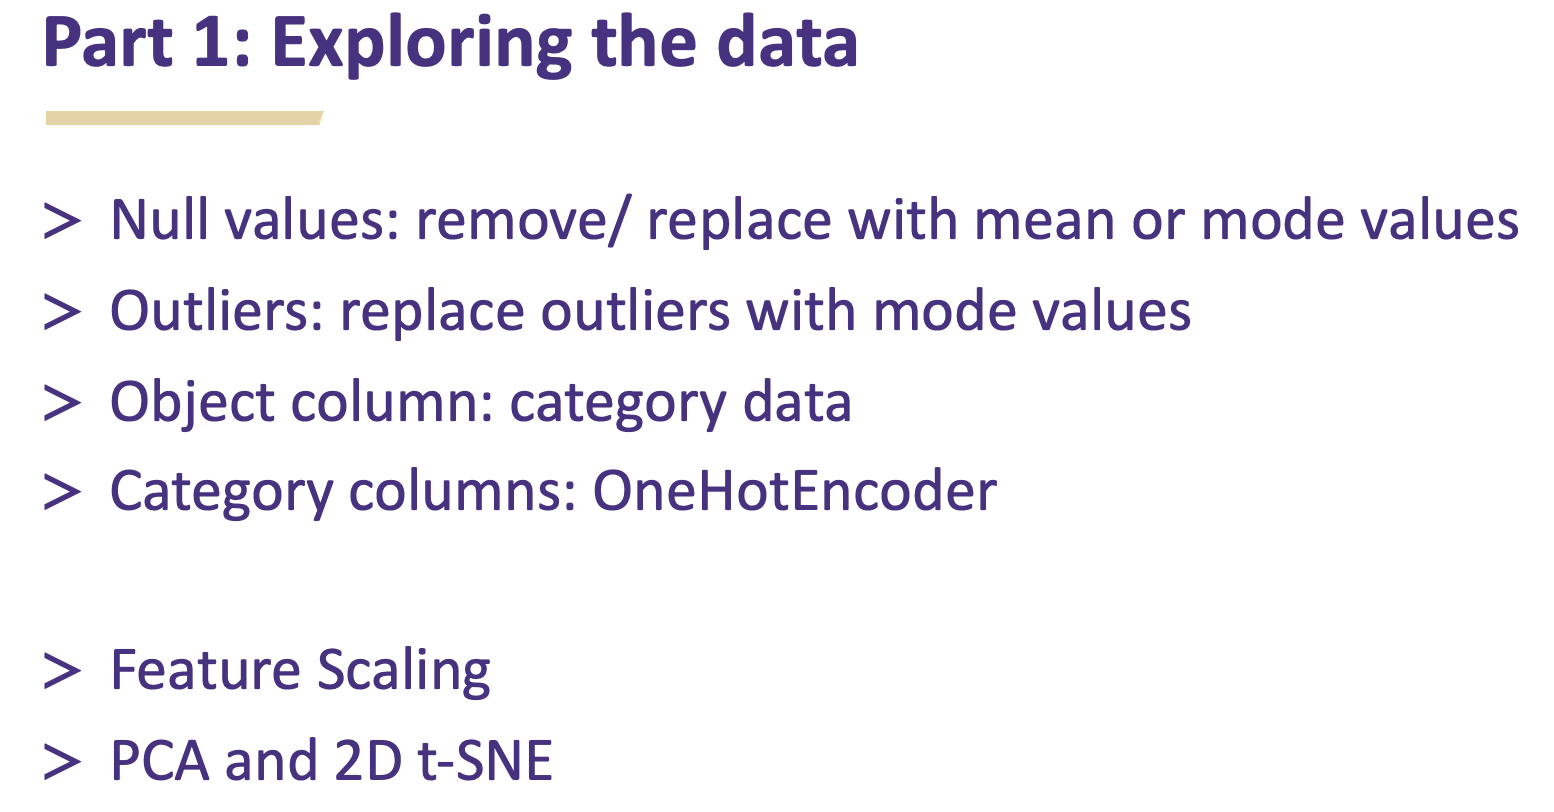

In [1]:
from IPython.display import Image 
Image("part1.jpeg", width=600, height=300)

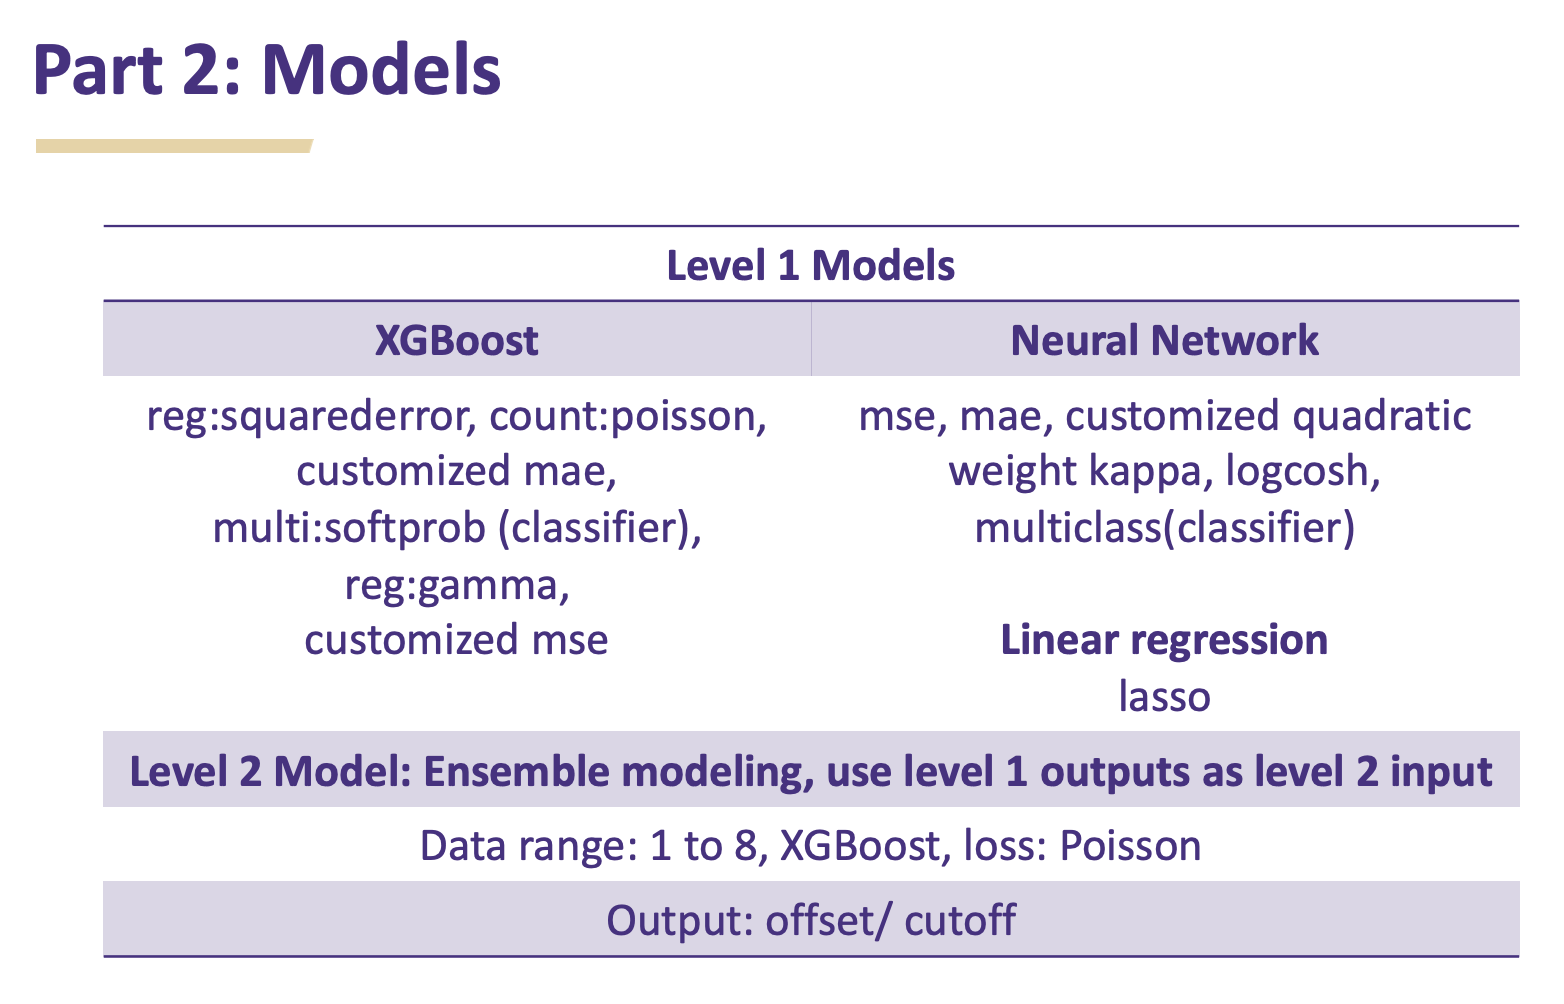

In [2]:
from IPython.display import Image 
Image("part2.jpeg", width=800, height=400)

## Part 1: Exploring the data

In [3]:
# author: Yuman Lin

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Data description from Kaggle**

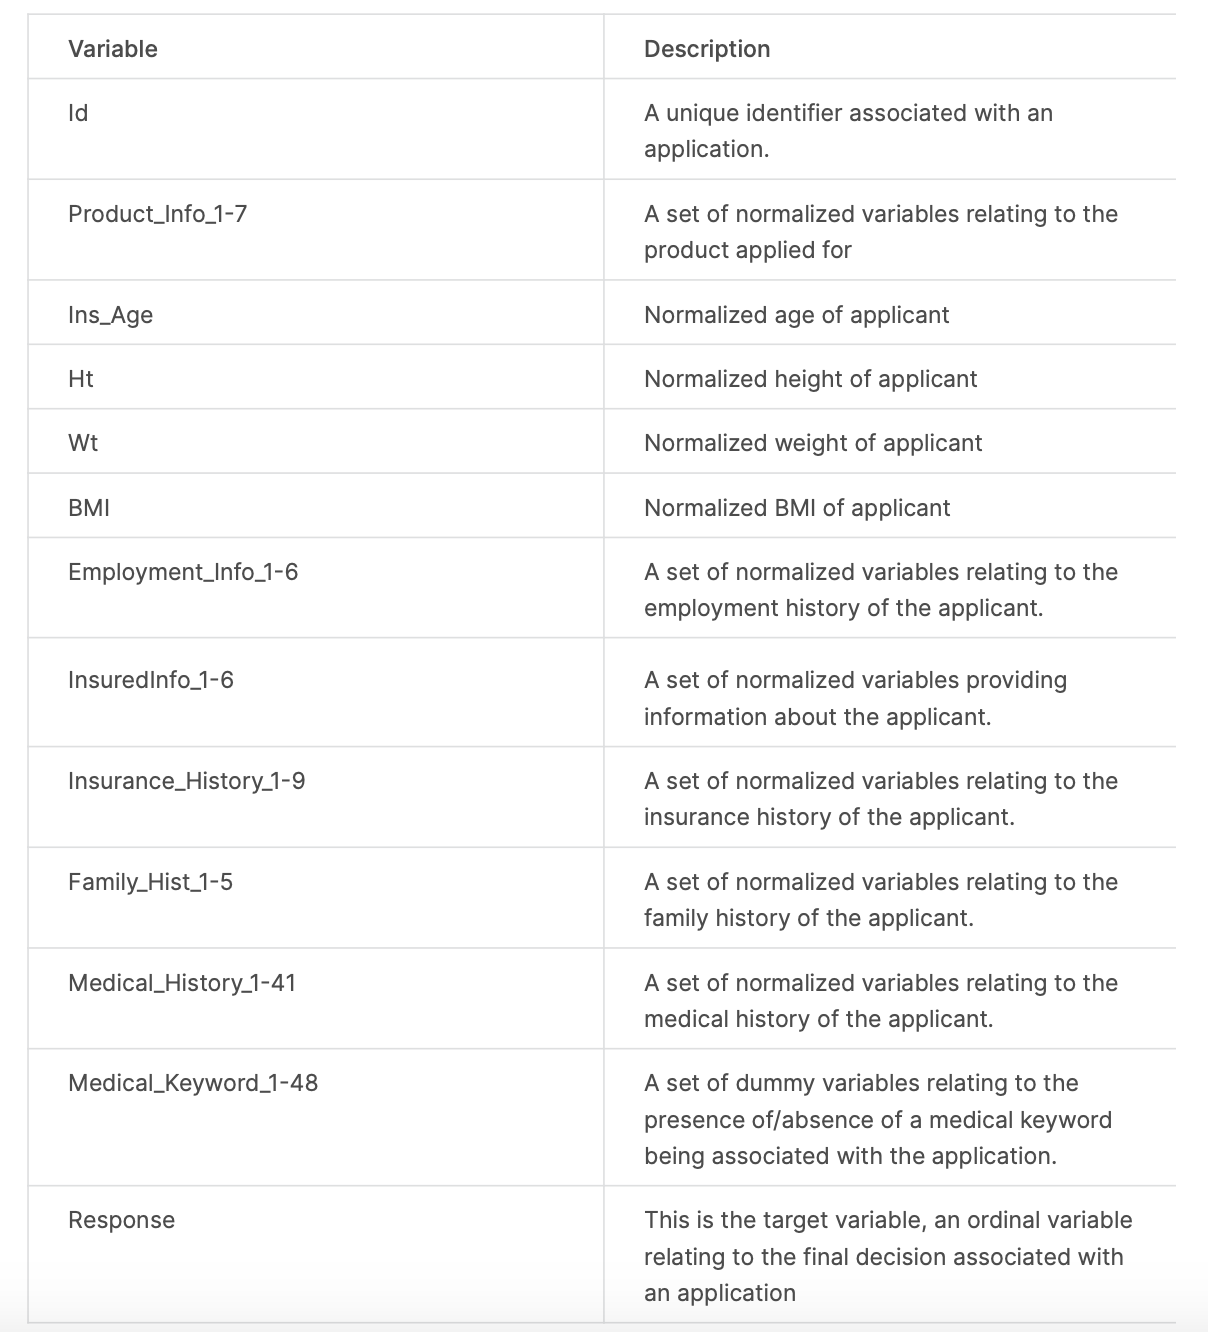

In [4]:
from IPython.display import Image 
Image("data_var.jpeg",width=800, height=400)

In [5]:
insurance = pd.read_csv("train.csv")
insurance.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [6]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB


In [7]:
insurance.get_dtype_counts()

float64     18
int64      109
object       1
dtype: int64

In [8]:
insurance.shape

(59381, 128)

In [9]:
df = insurance.drop("Id", axis = 1)
df.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,8
1,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,4
2,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,8
3,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,8
4,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,8


## Data processing
Process and analyze data according to different data types including category, continuous, discrete and binary data.     
The reason why binary variable and category variable are not mixed is that OneHotEncoder will be applied to category data. 

In [10]:
for index in df.columns.to_list():
    print("=========================")
    print(df[index].value_counts())

1    57816
2     1565
Name: Product_Info_1, dtype: int64
D3    14321
D4    10812
A8     6835
D1     6554
D2     6286
E1     2647
A1     2363
A6     2098
A2     1974
A7     1383
B2     1122
A3      977
A5      775
C3      306
C1      285
C4      219
A4      210
C2      160
B1       54
Name: Product_Info_2, dtype: int64
26    50892
10     6008
29     1334
31      411
15      251
37      139
30       64
4        58
8        48
11       40
28       37
36       25
9        11
21       11
23       10
33        9
2         8
17        3
6         3
34        2
3         2
12        2
32        2
38        1
13        1
16        1
5         1
18        1
19        1
20        1
22        1
24        1
27        1
1         1
Name: Product_Info_3, dtype: int64
0.076923    13279
0.230769    13115
0.487179     9685
1.000000     5808
0.282051     2862
            ...  
0.379487        1
0.169130        1
0.195731        1
0.238130        1
0.310084        1
Name: Product_Info_4, Length: 1491, dty

0    58494
1      887
Name: Medical_Keyword_28, dtype: int64
0    58683
1      698
Name: Medical_Keyword_29, dtype: int64
0    57894
1     1487
Name: Medical_Keyword_30, dtype: int64
0    58734
1      647
Name: Medical_Keyword_31, dtype: int64
0    58124
1     1257
Name: Medical_Keyword_32, dtype: int64
0    58025
1     1356
Name: Medical_Keyword_33, dtype: int64
0    58155
1     1226
Name: Medical_Keyword_34, dtype: int64
0    58969
1      412
Name: Medical_Keyword_35, dtype: int64
0    58763
1      618
Name: Medical_Keyword_36, dtype: int64
0    55427
1     3954
Name: Medical_Keyword_37, dtype: int64
0    58975
1      406
Name: Medical_Keyword_38, dtype: int64
0    58570
1      811
Name: Medical_Keyword_39, dtype: int64
0    55999
1     3382
Name: Medical_Keyword_40, dtype: int64
0    58784
1      597
Name: Medical_Keyword_41, dtype: int64
0    56677
1     2704
Name: Medical_Keyword_42, dtype: int64
0    58745
1      636
Name: Medical_Keyword_43, dtype: int64
0    58934
1      447
Na

## Data types:
(1) **category data**: Product_Info_1, Product_Info_2, Product_Info_3, Product_Info_5, Product_Info_6, Product_Info_7, Employment_Info_2, Employment_Info_3, Employment_Info_5, InsuredInfo_1, InsuredInfo_2, InsuredInfo_3, InsuredInfo_4, InsuredInfo_5, InsuredInfo_6, InsuredInfo_7, Insurance_History_1, Insurance_History_2, Insurance_History_3, Insurance_History_4, Insurance_History_7, Insurance_History_8, Insurance_History_9, Family_Hist_1, and  other Medical_History except 1,2,10,15,24,32   

(2) **continuous data**: Product_Info_4, Ins_Age, Ht, Wt, BMI, Employment_Info_1, Employment_Info_4, Employment_Info_6, Insurance_History_5, Family_Hist_2, Family_Hist_3, Family_Hist_4, Family_Hist_5   

(3) **discrete data**: Medical_History_1, Medical_History_2, Medical_History_10, Medical_History_15, Medical_History_24, Medical_History_32   

(4) **binary data**: all Medical_Keyword  

In [11]:
catagory_index = ["Product_Info_1", "Product_Info_2", "Product_Info_3", "Product_Info_5", "Product_Info_6", 
                  "Product_Info_7", "Employment_Info_2", "Employment_Info_3", "Employment_Info_5", "InsuredInfo_1", 
                  "InsuredInfo_2", "InsuredInfo_3", "InsuredInfo_4", "InsuredInfo_5", "InsuredInfo_6", 
                  "InsuredInfo_7", "Insurance_History_1", "Insurance_History_2", "Insurance_History_3", 
                  "Insurance_History_4", "Insurance_History_7", "Insurance_History_8", "Insurance_History_9", 
                  "Family_Hist_1", "Medical_History_3", "Medical_History_4", "Medical_History_5", 
                  "Medical_History_6", "Medical_History_7", "Medical_History_8", "Medical_History_9", 
                  "Medical_History_11", "Medical_History_12", "Medical_History_13", "Medical_History_14", 
                  "Medical_History_16", "Medical_History_17", "Medical_History_18", "Medical_History_19", 
                  "Medical_History_20", "Medical_History_21", "Medical_History_22", "Medical_History_23",
                  "Medical_History_25", "Medical_History_26", "Medical_History_27", "Medical_History_28",
                  "Medical_History_29", "Medical_History_30", "Medical_History_31", "Medical_History_33",
                  "Medical_History_34", "Medical_History_35", "Medical_History_36", "Medical_History_37",
                  "Medical_History_38", "Medical_History_39", "Medical_History_40", "Medical_History_41"]

continuous_index = ["Product_Info_4", "Ins_Age", "Ht", "Wt", "BMI", "Employment_Info_1", "Employment_Info_4", 
                    "Employment_Info_6", "Insurance_History_5", "Family_Hist_2", "Family_Hist_3", 
                    "Family_Hist_4", "Family_Hist_5"]

discrete_index = ["Medical_History_1", "Medical_History_2", "Medical_History_10", "Medical_History_15", 
                  "Medical_History_24", "Medical_History_32"]

index1 = df.columns.to_list()
binary_index = index1[78:126]

## Missing values: 
All the columns with missing values are continuous data or discrete data.   
(1) remove the columns the percentage of null value of which is larger than 90%.  
(2) most continuous/ discrete variables: replace the null value with mean value.  
(3) skewed variables: replace the null value with mode value.

In [12]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Medical_History_10,58824,0.990620
Medical_History_32,58274,0.981358
Medical_History_24,55580,0.935990
Medical_History_15,44596,0.751015
Family_Hist_5,41811,0.704114
Family_Hist_3,34241,0.576632
Family_Hist_2,28656,0.482579
Insurance_History_5,25396,0.427679
Family_Hist_4,19184,0.323066
Employment_Info_6,10854,0.182786


(1) remove the columns: Medical_History_10, Medical_History_32 and Medical_History_24

In [13]:
df = df.drop("Medical_History_10", axis = 1)
df = df.drop("Medical_History_32", axis = 1)
df = df.drop("Medical_History_24", axis = 1)

In [14]:
discrete_index = ["Medical_History_1", "Medical_History_2",  "Medical_History_15"]

(2) replace most of them with mean values because they are continuous variables or discrete variables

In [15]:
df["Medical_History_1"].value_counts()

1.0      7657
2.0      5727
0.0      4789
3.0      4722
4.0      3668
         ... 
156.0       1
223.0       1
130.0       1
172.0       1
175.0       1
Name: Medical_History_1, Length: 171, dtype: int64

In [16]:
# fill with mean value 
# df["Medical_History_10"] = df["Medical_History_10"].fillna(df["Medical_History_10"].mean())
# df["Medical_History_32"] = df["Medical_History_32"].fillna(df["Medical_History_32"].mean())
# df["Medical_History_24"] = df["Medical_History_24"].fillna(df["Medical_History_24"].mean())
df["Medical_History_15"] = df["Medical_History_15"].fillna(df["Medical_History_15"].mean())
df["Family_Hist_5"] = df["Family_Hist_5"].fillna(df["Family_Hist_5"].mean())
df["Family_Hist_3"] = df["Family_Hist_3"].fillna(df["Family_Hist_3"].mean())
df["Family_Hist_2"] = df["Family_Hist_2"].fillna(df["Family_Hist_2"].mean())
df["Insurance_History_5"] = df["Insurance_History_5"].fillna(df["Insurance_History_5"].mean())
df["Family_Hist_4"] = df["Family_Hist_4"].fillna(df["Family_Hist_4"].mean())
df["Employment_Info_6"] = df["Employment_Info_6"].fillna(df["Employment_Info_6"].mean())
df["Medical_History_1"] = df["Medical_History_1"].fillna(df["Medical_History_1"].mean())
df["Employment_Info_1"] = df["Employment_Info_1"].fillna(df["Employment_Info_1"].mean())
df["Medical_History_1"] = df["Medical_History_1"].fillna(df["Medical_History_1"].mean())

(3) skewed columns: replace with mode value

In [17]:
df["Employment_Info_4"].value_counts()

0.000000    44659
0.010000      418
0.020000      345
0.050000      338
0.030000      320
            ...  
0.024400        1
0.050500        1
0.058100        1
0.270174        1
0.034900        1
Name: Employment_Info_4, Length: 871, dtype: int64

In [18]:
df["Employment_Info_4"] = df["Employment_Info_4"].fillna(0.0)

In [19]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
Response,0,0.0
Medical_History_9,0,0.0
Family_Hist_1,0,0.0
Family_Hist_2,0,0.0
Family_Hist_3,0,0.0


## Category data: outliners
Before OneHotEncoder is applied, outliers of category data will be replaced by the mode value because all these columns are skewed.

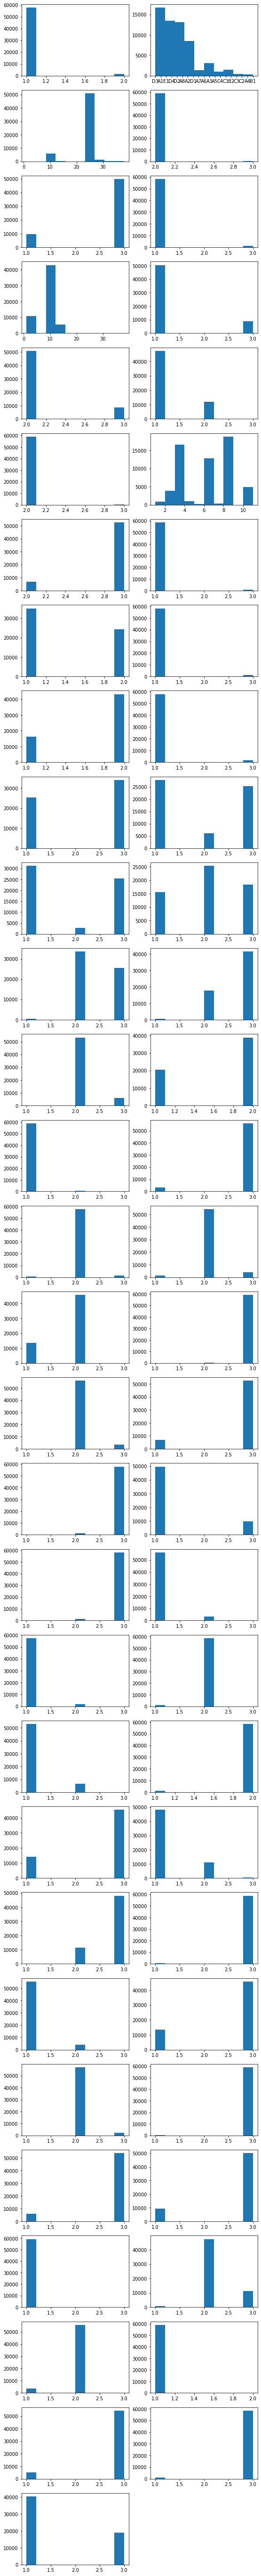

In [20]:
# the histogram shows that the data is imbalanced
plt.figure(figsize=(9, 100))
for i in range(0, 59):
    plt.subplot(30, 2, i+1)
    item = catagory_index[i]
    plt.hist(df[item])

In [21]:
for i in range(0, len(catagory_index)):
    column_name = catagory_index[i]
    print(df[column_name].value_counts())

1    57816
2     1565
Name: Product_Info_1, dtype: int64
D3    14321
D4    10812
A8     6835
D1     6554
D2     6286
E1     2647
A1     2363
A6     2098
A2     1974
A7     1383
B2     1122
A3      977
A5      775
C3      306
C1      285
C4      219
A4      210
C2      160
B1       54
Name: Product_Info_2, dtype: int64
26    50892
10     6008
29     1334
31      411
15      251
37      139
30       64
4        58
8        48
11       40
28       37
36       25
9        11
21       11
23       10
33        9
2         8
17        3
6         3
34        2
3         2
12        2
32        2
38        1
13        1
16        1
5         1
18        1
19        1
20        1
22        1
24        1
27        1
1         1
Name: Product_Info_3, dtype: int64
2    58968
3      413
Name: Product_Info_5, dtype: int64
3    49690
1     9691
Name: Product_Info_6, dtype: int64
1    58086
3     1293
2        2
Name: Product_Info_7, dtype: int64
9     34573
1      8934
12     7714
14     4819
3      

## Outliers
**data replace: if the frequency is less than 10, its value will be replaced by the most frequent value**  
(1) Product_Info_7: replace value 2 with 1   
(2) Insurance_History_2: replace value 2 with 1   
(3) Insurance_History_3: replace value 2 with 3   
(4) Medical_History_3: replace value 1 with 2   
(5) Medical_History_5: replace value 3 with 1   
(6) Medical_History_6: replace value 2 with 3   
(7) Medical_History_9: replace value 3 with 2   
(8) Medical_History_12: replace value 1 with 2   
(9) Medical_History_13: replace value 2 with 3   
(10) Medical_History_16: replace value 2 with 1   
(11) Medical_History_17: replace value 1 with 3   
(12) Medical_History_19: replace value 3 with 1   
(13) Medical_History_20: replace value 3 with 2  
(14) Medical_History_21: replace value 3 with 1  
(15) Medical_History_23: replace value 2 with 3   
(16) Medical_History_26: replace value 1 with 3   
(17) Medical_History_27: replace value 2 with 3   
(18) Medical_History_28: replace value 3 with 1   
(19) Medical_History_29: replace value 2 with 3   
(20) Medical_History_30: replace value 1 with 2   
(21) Medical_History_31: replace value 2 with 3   
(22) Medical_History_34: replace value 2 with 1  
(23) Medical_History_35: replace value 2 with 1  
(24) Medical_History_37: replace value 2 with 1    
(25) Medical_History_39: replace value 2 with 3   
(26) Medical_History_40: replace value 2 with 3   
(27) Medical_History_41: replace value 2 with 1

In [22]:
df["Product_Info_7"][df["Product_Info_7"] == 2] = 1
df["Insurance_History_2"][df["Insurance_History_2"] == 2] = 1
df["Insurance_History_3"][df["Insurance_History_3"] == 2] = 3
df["Medical_History_3"][df["Medical_History_3"] == 1] = 2
df["Medical_History_5"][df["Medical_History_5"] == 3] = 1

df["Medical_History_6"][df["Medical_History_6"] == 2] = 3
df["Medical_History_9"][df["Medical_History_9"] == 3] = 2
df["Medical_History_12"][df["Medical_History_12"] == 1] = 2
df["Medical_History_13"][df["Medical_History_13"] == 2] = 3
df["Medical_History_16"][df["Medical_History_16"] == 2] = 1

df["Medical_History_17"][df["Medical_History_17"] == 1] = 3
df["Medical_History_19"][df["Medical_History_19"] == 3] = 1
df["Medical_History_20"][df["Medical_History_20"] == 3] = 2
df["Medical_History_23"][df["Medical_History_23"] == 2] = 3
df["Medical_History_26"][df["Medical_History_26"] == 1] = 3

df["Medical_History_27"][df["Medical_History_27"] == 2] = 3
df["Medical_History_28"][df["Medical_History_28"] == 3] = 1
df["Medical_History_29"][df["Medical_History_29"] == 2] = 3
df["Medical_History_30"][df["Medical_History_30"] == 1] = 2
df["Medical_History_31"][df["Medical_History_31"] == 2] = 3

df["Medical_History_34"][df["Medical_History_34"] == 2] = 1
df["Medical_History_37"][df["Medical_History_37"] == 3] = 2
df["Medical_History_39"][df["Medical_History_39"] == 2] = 3
df["Medical_History_40"][df["Medical_History_40"] == 2] = 3
df["Medical_History_41"][df["Medical_History_41"] == 2] = 1

df["Medical_History_21"][df["Medical_History_21"] == 3] = 1
df["Medical_History_35"][df["Medical_History_35"] == 2] = 1

In [23]:
df["Product_Info_3"][df["Product_Info_3"] == 1] = 26
df["Product_Info_3"][df["Product_Info_3"] == 27] = 26
df["Product_Info_3"][df["Product_Info_3"] == 24] = 26
df["Product_Info_3"][df["Product_Info_3"] == 22] = 26
df["Product_Info_3"][df["Product_Info_3"] == 20] = 26
df["Product_Info_3"][df["Product_Info_3"] == 19] = 26
df["Product_Info_3"][df["Product_Info_3"] == 18] = 26
df["Product_Info_3"][df["Product_Info_3"] == 5] = 26
df["Product_Info_3"][df["Product_Info_3"] == 16] = 26
df["Product_Info_3"][df["Product_Info_3"] == 13] = 26
df["Product_Info_3"][df["Product_Info_3"] == 38] = 26
df["Product_Info_3"][df["Product_Info_3"] == 32] = 26
df["Product_Info_3"][df["Product_Info_3"] == 12] = 26
df["Product_Info_3"][df["Product_Info_3"] == 3] = 26
df["Product_Info_3"][df["Product_Info_3"] == 34] = 26
df["Product_Info_3"][df["Product_Info_3"] == 6] = 26
df["Product_Info_3"][df["Product_Info_3"] == 17] = 26
df["Product_Info_3"][df["Product_Info_3"] == 2] = 26
df["Product_Info_3"][df["Product_Info_3"] == 33] = 26

In [24]:
df["Employment_Info_2"][df["Employment_Info_2"] == 31] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 29] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 17] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 5] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 28] = 9

df["Employment_Info_2"][df["Employment_Info_2"] == 38] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 22] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 35] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 30] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 18] = 9

df["Employment_Info_2"][df["Employment_Info_2"] == 19] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 33] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 23] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 25] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 26] = 9

df["Employment_Info_2"][df["Employment_Info_2"] == 34] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 21] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 7] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 4] = 9

In [25]:
for i in range(0, len(catagory_index)):
    column_name = catagory_index[i]
    print(df[column_name].value_counts())

1    57816
2     1565
Name: Product_Info_1, dtype: int64
D3    14321
D4    10812
A8     6835
D1     6554
D2     6286
E1     2647
A1     2363
A6     2098
A2     1974
A7     1383
B2     1122
A3      977
A5      775
C3      306
C1      285
C4      219
A4      210
C2      160
B1       54
Name: Product_Info_2, dtype: int64
26    50934
10     6008
29     1334
31      411
15      251
37      139
30       64
4        58
8        48
11       40
28       37
36       25
21       11
9        11
23       10
Name: Product_Info_3, dtype: int64
2    58968
3      413
Name: Product_Info_5, dtype: int64
3    49690
1     9691
Name: Product_Info_6, dtype: int64
1    58088
3     1293
Name: Product_Info_7, dtype: int64
9     34638
1      8934
12     7714
14     4819
3      1724
15      480
11      456
32      199
10      175
36       63
37       53
27       37
2        23
13       20
16       18
6        17
20       11
Name: Employment_Info_2, dtype: int64
1    50447
3     8934
Name: Employment_Info_3, dtype

**Object column**: Product_Info_2   
Transfer the object column to integer so that OneHotEncoder can be applied to this category column.

Product_Info_2


(array([16684., 13459., 13121.,  8528.,  1383.,  3075.,   994.,  1407.,
          466.,   264.]),
 array([ 0. ,  1.8,  3.6,  5.4,  7.2,  9. , 10.8, 12.6, 14.4, 16.2, 18. ]),
 <a list of 10 Patch objects>)

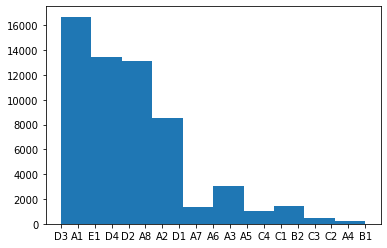

In [26]:
# the only object column
column_name = catagory_index[1]
print(column_name)
plt.hist(df[column_name])

In [27]:
df['Product_Info_2'] = pd.factorize(df['Product_Info_2'])[0]

In [28]:
df.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,1,0,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,8
1,1,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,4
2,1,2,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,8
3,1,3,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,8
4,1,4,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,8


## New columns
The new columns do not have a significant improvement/even make the prediction worse so I do not include them in my final model. Some results of these model are shown in the appendix code. 


Here are the new columns I have tried:  
(1) Med_Keywords_Count  
(2) object column  
(3) BMI_Age = BMI * Ins_age  

In [29]:
# # 
# med_keyword_columns = df.columns[df.columns.str.startswith('Medical_Keyword_')]
# df['Med_Keywords_Count'] = df[med_keyword_columns].sum(axis=1)
# # 
# df['Product_Info_2_char'] = df.Product_Info_2.str[0]
# df['Product_Info_2_num'] = df.Product_Info_2.str[1]
# df['Product_Info_2_char'] = pd.factorize(df['Product_Info_2_char'])[0]
# df['Product_Info_2_num'] = pd.factorize(df['Product_Info_2_num'])[0]
# # 
# df['BMI_Age'] = df['BMI'] * df['Ins_Age']

## OneHotEncoder for catagory

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
full_pipeline = ColumnTransformer([("cat", OneHotEncoder(), catagory_index)])
X = full_pipeline.fit_transform(df)

In [31]:
# X: the dataframe of catagory columns
X = pd.DataFrame(X)

non_cat_index = binary_index + continuous_index + discrete_index 
# df_non_cat: dataframe with catagory columns
df_non_cat = df[non_cat_index]
df_new = pd.concat([df_non_cat, X], axis=1, sort=False)
df_new.head()

,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,...,175,176,177,178,179,180,181,182,183,184
0,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


## Train set, validation set and test set 
Train set: train a model (size: 44381)  
Validation set: tune parameters (size: 9000)   
Test set: test the model (size: 6000)

In [32]:
df_new["Response"] = df["Response"]
print(df_new.shape)
df_new.head()

(59381, 250)


,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,...,176,177,178,179,180,181,182,183,184,Response
0,0,0,0,0,0,0,0,0,0,0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,8
1,0,0,0,0,0,0,0,0,0,0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,4
2,0,0,0,0,0,0,0,0,0,0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,8
3,0,0,0,0,0,0,0,0,0,0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,8
4,0,0,0,0,0,0,0,0,0,0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,8


In [33]:
# separate data into test set, train set (9000) and validation set (6000)
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=9000, random_state=42)
for train_index, test_index in split.split(df_new, df_new["Response"]):
    strat_train_set = df_new.loc[train_index]
    val_set = df_new.loc[test_index]

#val_set = test_set.reset_index()
strat_train_set = strat_train_set.reset_index()

split = StratifiedShuffleSplit(n_splits=1, test_size=6000, random_state=42)
for train_index, test_index in split.split(strat_train_set, strat_train_set["Response"]):
    train_set = strat_train_set.loc[train_index]
    test_set = strat_train_set.loc[test_index]

In [34]:
train_set = train_set.drop("index", axis = 1)
print(train_set.shape)
train_set.head()

(44381, 250)


,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,...,176,177,178,179,180,181,182,183,184,Response
7047,0,0,0,0,0,0,0,0,0,0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,2
19682,1,0,0,0,0,0,0,1,0,0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,8
14710,0,0,0,0,0,0,0,0,0,0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,6
3570,0,0,0,0,0,0,0,0,0,0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,7
5348,0,0,0,0,0,0,0,0,0,0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,6


In [35]:
#val_set = val_set.drop("level_0", axis = 1)
print(val_set.shape)
val_set.head()

(9000, 250)


,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,...,176,177,178,179,180,181,182,183,184,Response
15959,0,0,0,0,0,0,0,0,0,1,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,5
15730,0,0,0,0,0,0,0,0,0,0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,5
18509,0,0,0,0,0,0,0,0,0,0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1
31718,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,8
1476,0,0,0,0,0,0,0,0,0,0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,5


In [36]:
test_set = test_set.drop("index", axis = 1)
print(test_set.shape)
test_set.head(5)

(6000, 250)


,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,...,176,177,178,179,180,181,182,183,184,Response
36775,0,0,0,0,0,0,0,0,0,0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,6
20032,0,0,0,0,0,0,0,0,0,0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,8
18283,0,0,0,0,0,0,0,0,0,0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,8
10957,0,0,0,0,0,0,0,0,0,0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,8
32207,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1


## Continuous variables  
The range of continuous variables is from 0 to 1. Variance are small so that they are not outliers.

In [37]:
# has normalized, not outliners
df_continuous = train_set[continuous_index]

for index in continuous_index:
    print(index)
    max_value = max(df_continuous[index])
    min_value = min(df_continuous[index])
    mean_value = (df_continuous[index]).mean()
    var_value = (df_continuous[index]).var()
    print("max value:", max_value, "; min value:", min_value, "; mean:", mean_value, "; variance:", var_value)

Product_Info_4
max value: 1.0 ; min value: 0.0 ; mean: 0.3292032126852617 ; variance: 0.07967876755909994
Ins_Age
max value: 0.9253731340000001 ; min value: 0.0 ; mean: 0.4058362342070331 ; variance: 0.038693986774924666
Ht
max value: 1.0 ; min value: 0.0 ; mean: 0.7074231192289011 ; variance: 0.005520211049936597
Wt
max value: 1.0 ; min value: 0.0 ; mean: 0.29292601278165065 ; variance: 0.007971644338874657
BMI
max value: 1.0 ; min value: 0.0 ; mean: 0.46984235864649937 ; variance: 0.014959714764870992
Employment_Info_1
max value: 1.0 ; min value: 0.0 ; mean: 0.07778310014067709 ; variance: 0.006750468868063748
Employment_Info_4
max value: 1.0 ; min value: 0.0 ; mean: 0.005479673036659847 ; variance: 0.0008928454659136677
Employment_Info_6
max value: 1.0 ; min value: 0.0 ; mean: 0.3622424231278448 ; variance: 0.09989488649554366
Insurance_History_5
max value: 0.64048402 ; min value: 0.0 ; mean: 0.0017197554697405242 ; variance: 1.7820215567385247e-05
Family_Hist_2
max value: 1.0 ; min

**correlation matrix**    
Correlation matrix helps to figure out features which contain similar information. If any columns are highly correlated, they contain similar information so that one of them could be removed. 

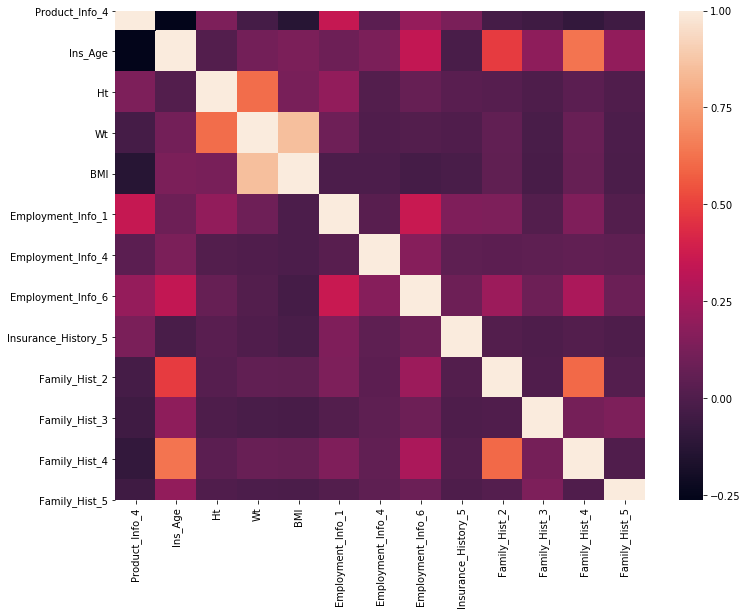

In [38]:
#correlation matrix
corrmat = df_continuous.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1.0, square=True)

**high-correlated pairs**:   
(1) BMI and Wt   
(2) Family_Hist_2 and Family_Hist_4  
(3) Wt and Ht  
(4) Family_Hist_4 and Ins_Age   


All of four pairs indicate positive relation. I do not remove any of them from dataset because the correlation are not high.

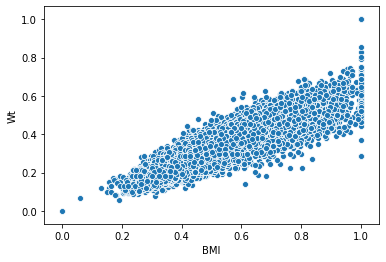

In [39]:
# scatter plot
sns.scatterplot(x="BMI", y="Wt", data=df_continuous)

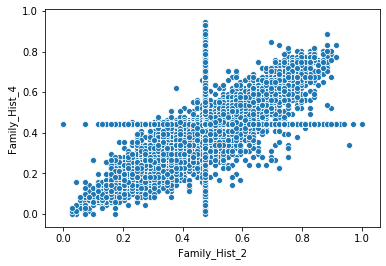

In [40]:
sns.scatterplot(x="Family_Hist_2", y="Family_Hist_4", data=df_continuous)

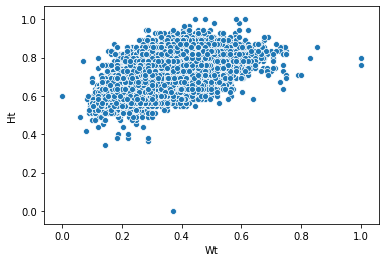

In [41]:
sns.scatterplot(x="Wt", y="Ht", data=df_continuous)

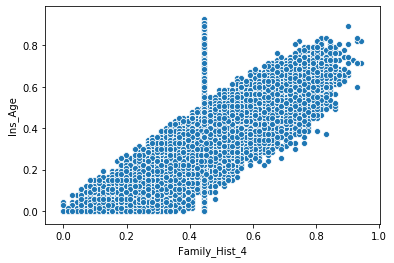

In [42]:
sns.scatterplot(x="Family_Hist_4", y="Ins_Age", data=df_continuous)

**Boxplot**   
Boxplot: between continuous variables and Response  
Will a client with a specific characteristic be more likely to buy some insurance product?  
The boxplot does not indicate such a phenomenon.

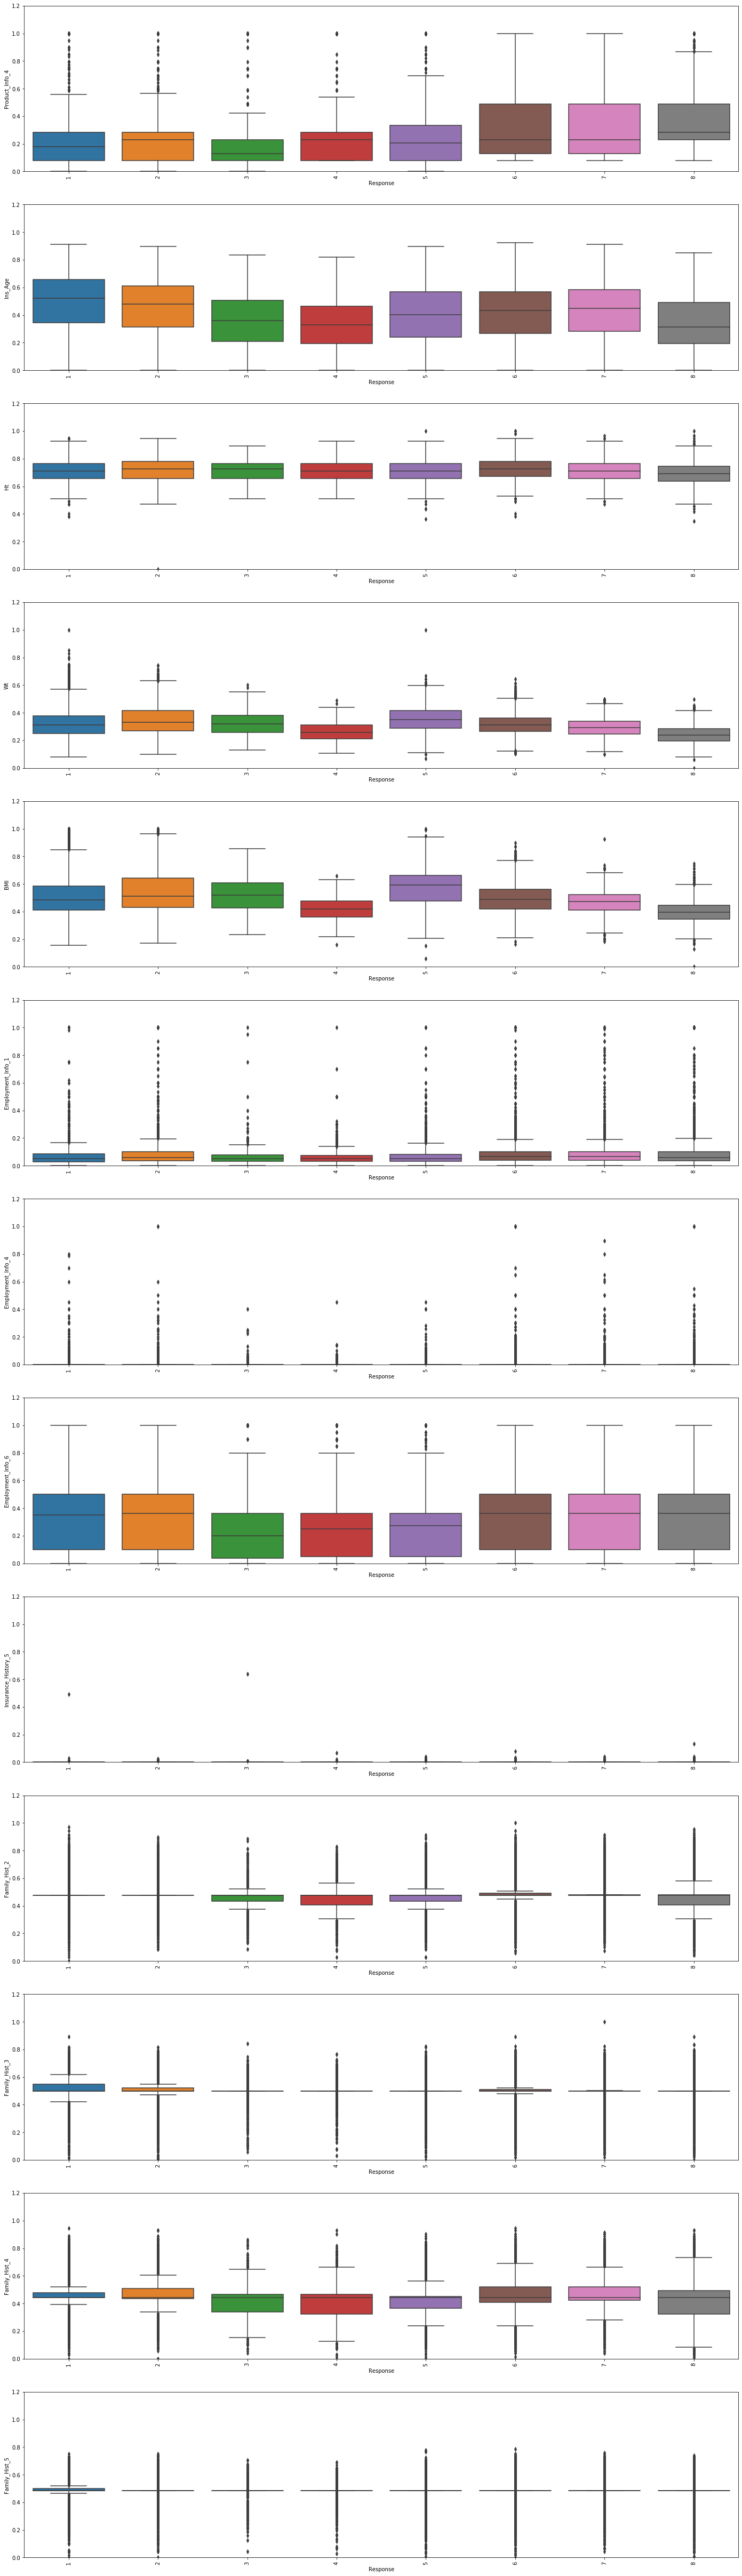

In [43]:
# boxplot
f, ax = plt.subplots(figsize=(24, 88))
i = 0
for index in continuous_index:
    plt.subplot(13, 1, i+1)
    i = i+1
    fig = sns.boxplot(x="Response", y=index, data=train_set)
    fig.axis(ymin=0, ymax=1.2)
    plt.xticks(rotation=90)

## Binary variables  
(1) Histogram: most values are 0 so that 0 may stand for healthy state because most clients are healthy.   
(2) New column (Med_Keywords_Count): add up the values of all binary columns   
(3) It is expected to figure out a strong correlation between Med_Keywords_Count and Response column: A healthier client (smaller value of Med_Keywords_Count) should choose some insurance product which is designed for healthy clients.  
(4) The plot indicates that the healthiest client group (Med_Keywords_Count = 0) would choose Response 8.   
(5) A model included Med_Keywords_Count does not have significant improvement in the final prediction. Therefore, the following model training does not include the new column Med_Keywords_Count.  
(6) The code of model included new column Med_Keywords_Count is included in the appendix. (the model of adding new columns)

In [44]:
len(binary_index)

48

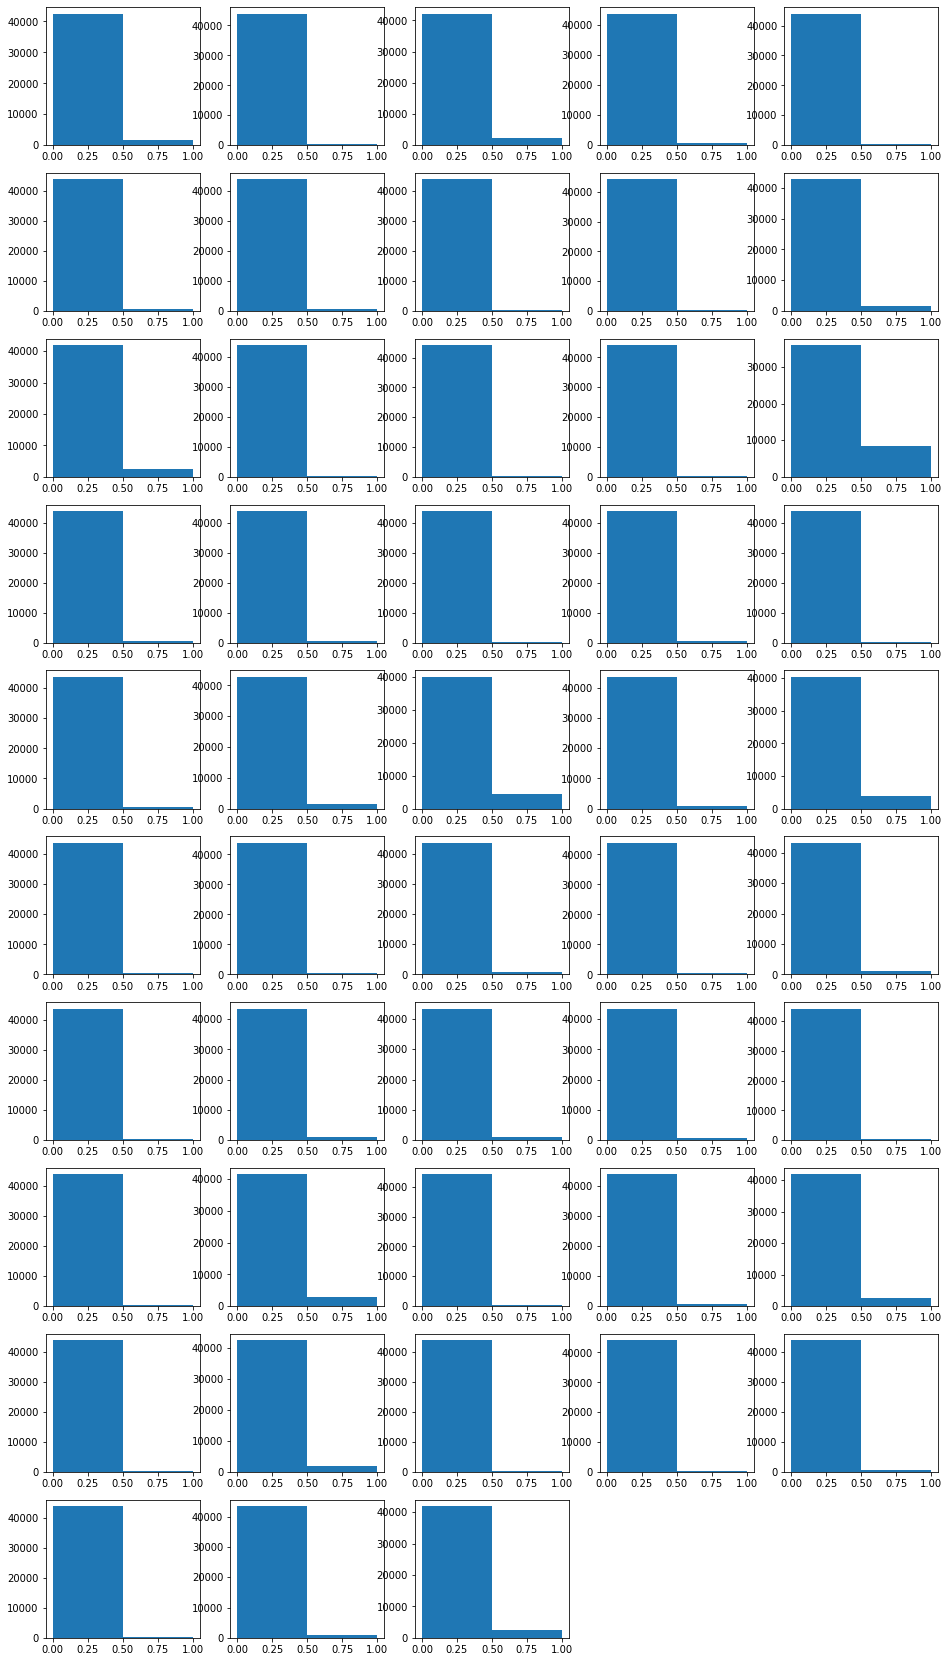

In [45]:
# histogram
plt.figure(figsize=(16, 30))
for i in range(0, 48):
    plt.subplot(10, 5, i+1)
    item = binary_index[i]
    plt.hist(train_set[item], bins = 2)

**Add new column**: Med_Keywords_Count

In [46]:
med_keyword_columns = df.columns[df.columns.str.startswith('Medical_Keyword_')]
df['Med_Keywords_Count'] = df[med_keyword_columns].sum(axis=1)

In [47]:
# relationship with Response column
data_matrix = []

for i in range (1, 9):
    temp = []
    for j in range (0, 17):
        value = sum(np.logical_and(df["Med_Keywords_Count"]==j, df["Response"]==i))
        temp.append(value)
    data_matrix.append(temp)

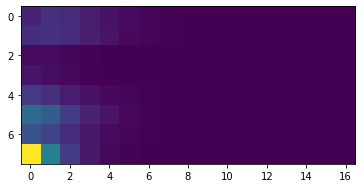

In [48]:
data_matrix = np.array(data_matrix)
plt.imshow(data_matrix)

In [49]:
# do not have a obvious relationship, drop it
df = df.drop("Med_Keywords_Count", axis = 1)
df.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,1,0,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,8
1,1,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,4
2,1,2,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,8
3,1,3,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,8
4,1,4,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,8


## Response 
(1) 8 labels in total: imbalanced class problem, most of them are class 8.  
(2) Heatmap: No one variable has a strong correlation with Response.   
(3) Insurance product decision should consider every aspect of one client so that no a single variable will play a dominant role.  

In [50]:
train_set['Response'].value_counts()

8    14566
6     8396
7     5999
2     4897
1     4639
5     4060
4     1067
3      757
Name: Response, dtype: int64

(array([ 4639.,  4897.,   757.,  1067.,  4060.,  8396., 20565.]),
 array([1., 2., 3., 4., 5., 6., 7., 8.]),
 <a list of 7 Patch objects>)

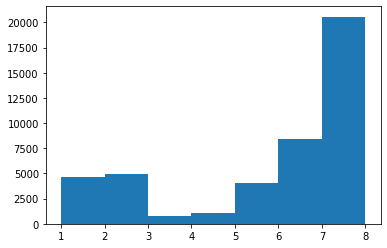

In [51]:
# result histogram
# From this information, we see this is an imbalanced class problem.
plt.hist(train_set["Response"], bins=7)

In [52]:
#skewness and kurtosis
print("Skewness: %f" % train_set['Response'].skew())
print("Kurtosis: %f" % train_set['Response'].kurt())

Skewness: -0.774691
Kurtosis: -0.822180


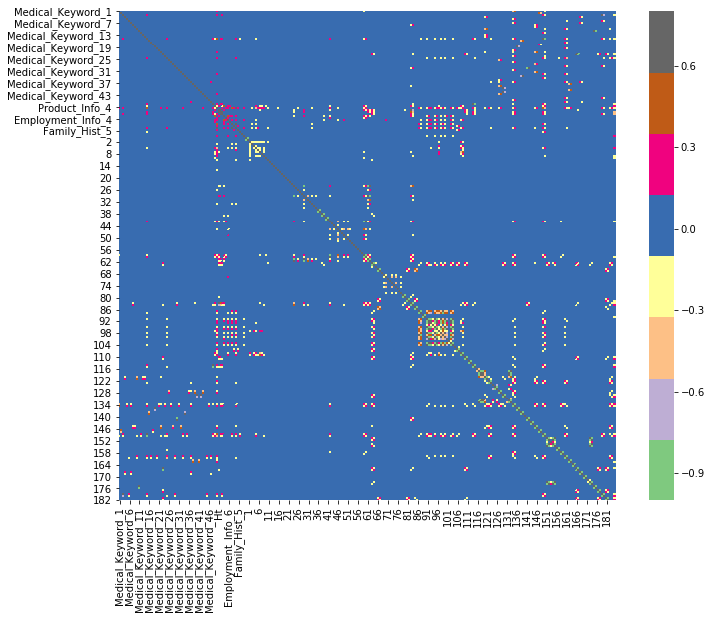

In [53]:
#correlation matrix
corrmat = train_set.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap = "Accent")

According to the crystal ball, these are ten variables most correlated with 'Response'.  
There are not any variables with strong correlation. (Why PCA does not work well)   
The decision of an insurance product should consider every aspect of a client and no indicator plays a dominant role.

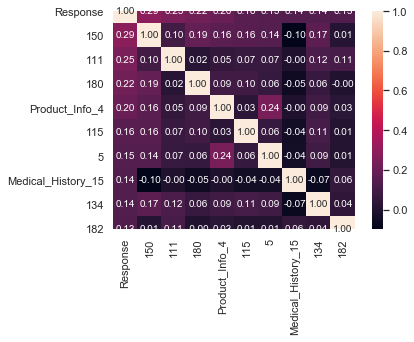

In [54]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Response')['Response'].index
cm = np.corrcoef(train_set[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Separate features and response

In [55]:
val_set.head()

,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,...,176,177,178,179,180,181,182,183,184,Response
15959,0,0,0,0,0,0,0,0,0,1,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,5
15730,0,0,0,0,0,0,0,0,0,0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,5
18509,0,0,0,0,0,0,0,0,0,0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1
31718,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,8
1476,0,0,0,0,0,0,0,0,0,0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,5


In [56]:
y_train = train_set["Response"]
y_val = val_set["Response"]
y_test = test_set["Response"]

X_train = train_set.drop("Response", axis = 1)
X_val = val_set.drop("Response", axis = 1)
X_test = test_set.drop("Response", axis = 1)

## Feature scaling

In [57]:
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()

standard.fit(X_train)
X_train = pd.DataFrame(standard.transform(X_train), columns = X_train.columns)

standard.fit(X_val)
X_val = pd.DataFrame(standard.transform(X_val), columns = X_val.columns)

standard.fit(X_test)
X_test = pd.DataFrame(standard.transform(X_test), columns = X_test.columns)

In [58]:
X_train.head()

,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,...,175,176,177,178,179,180,181,182,183,184
0,-0.207913,-0.096563,-0.227776,-0.123148,-0.092436,-0.113045,-0.118443,-0.104344,-0.080394,-0.196442,...,-0.255367,0.255367,0.069934,-0.069934,-0.303755,0.303755,-0.128959,0.128959,0.687027,-0.687027
1,4.809701,-0.096563,-0.227776,-0.123148,-0.092436,-0.113045,-0.118443,9.583699,-0.080394,-0.196442,...,-0.255367,0.255367,0.069934,-0.069934,-0.303755,0.303755,-0.128959,0.128959,-1.455546,1.455546
2,-0.207913,-0.096563,-0.227776,-0.123148,-0.092436,-0.113045,-0.118443,-0.104344,-0.080394,-0.196442,...,-0.255367,0.255367,0.069934,-0.069934,-0.303755,0.303755,-0.128959,0.128959,0.687027,-0.687027
3,-0.207913,-0.096563,-0.227776,-0.123148,-0.092436,-0.113045,-0.118443,-0.104344,-0.080394,-0.196442,...,-0.255367,0.255367,0.069934,-0.069934,-0.303755,0.303755,-0.128959,0.128959,0.687027,-0.687027
4,-0.207913,-0.096563,-0.227776,-0.123148,-0.092436,-0.113045,-0.118443,-0.104344,-0.080394,-0.196442,...,-0.255367,0.255367,0.069934,-0.069934,-0.303755,0.303755,-0.128959,0.128959,0.687027,-0.687027


In [59]:
y_train

7047     2
19682    8
14710    6
3570     7
5348     6
        ..
8437     5
49695    8
20999    7
13118    8
43700    2
Name: Response, Length: 44381, dtype: int64

## Data vitualization
(1) 2D t-SNE embedding: no cluster  
(2) first PCA then 2D t-SNE embedding: no cluster  
Model with PCA feature: less time but worse prediction (the code is appended in the appendix)

## (1) 2D t-SNE embedding   
Data vitualization: there is no cluster.

In [60]:
# t-SNE, 2 dimentions
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, random_state=42).fit_transform(X_train)

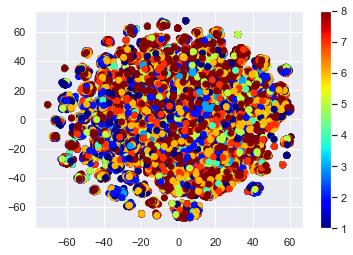

In [61]:
# scatterplot
from matplotlib import pyplot as plt
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y_train,cmap = "jet")
plt.colorbar()
plt.show()

## (2) PCA and 2D t-SNE

In [62]:
from sklearn.decomposition import PCA
pca = PCA()
df_cat = df[catagory_index]
df_cat_30 = pca.set_params(n_components=30).fit_transform(df_cat)

In [63]:
df_cat_30 = pd.DataFrame(df_cat_30)
df_non_cat = df[non_cat_index]
df_new_PCA = pd.concat([df_non_cat, df_cat_30], axis=1, sort=False)

In [64]:
# t-SNE, 2 dimentions
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, random_state=42).fit_transform(df_new_PCA)

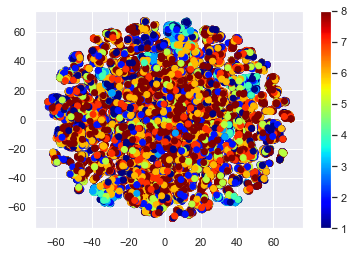

In [65]:
# scatterplot
from matplotlib import pyplot as plt
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=df["Response"],cmap = "jet")
plt.colorbar()
plt.show()

## Part 2: model

**Classification or Regression**
The task of the competition is to predict the insurance class (from 1 to 8). It is a classfication problem but regression model also works. Once a regression model produce a prediction, it should be rounded to the nearest integer. If the integer is larger than 8, it should be 8 and if the integer is smaller than 1, it should be clipped to 1.  


**Model Structure**
The structure can be seperated into two levels: 

**Level 1**  
The first level model contains three types of models: XGBoost, neural network and linear regression. In general, XGBoost performs better than neural network and linear regression. Neural network needs more time and have the problem of overfitting. Linear regression performs the worst but run the fastest.    

(1) XGBoost: XGBoost is an implementation of gradient boosted decision trees designed for speed and performance. Its idea is similar as Adaboost or Gradient boosting and XGBoost has been responsible for winning many data science competitions. For each XGBoost model, the hype-parameters are similar and the major difference is the objective function. There are 6 XGBoost models, including reg:squarederror, count:poisson, customized mae, multi:softprob (classifier), reg:gamma and customized mse. Only multi:softprob model is a classifer.   

(2) Neural network: There are 6 neural network models with different loss function, including mse, mae, customized quadratic weight kappa, logcosh, multiclass. Only multiclass neural network is a classifer.   

(3) Linear regression: there is only one linear lasso model, which tries to explain the linear relationship among the feature and Response column. The idea is inspired by ResNet-34 CNN model. It also helps with solve overfitting problem.   
"Customized" means that the objective function is implemented by myself.

**Level 2**  
With the outputs of 12 models above, they will be firstly clipped between 1 and 8 to solve the problem of outliers. These outputs are the input of the level 2 model. A XGBoost model with poisson loss function works the best among  different loss functions. 

**Cutoff**   
The cutoff function applies an offset to select predictions generated from the XGBoost model. The XGBoost model with poisson loss function is a regressor so that the prediction is a continuous variable instead of a discrete one. Without cutoff, the prediction will be rounded directly. With cutoff, the prediction will firstly add the cutoff value then be rounded.  
Without cutoff: np.round(prediction)  
With cutoff: np.round(prediction + cutoff value)   

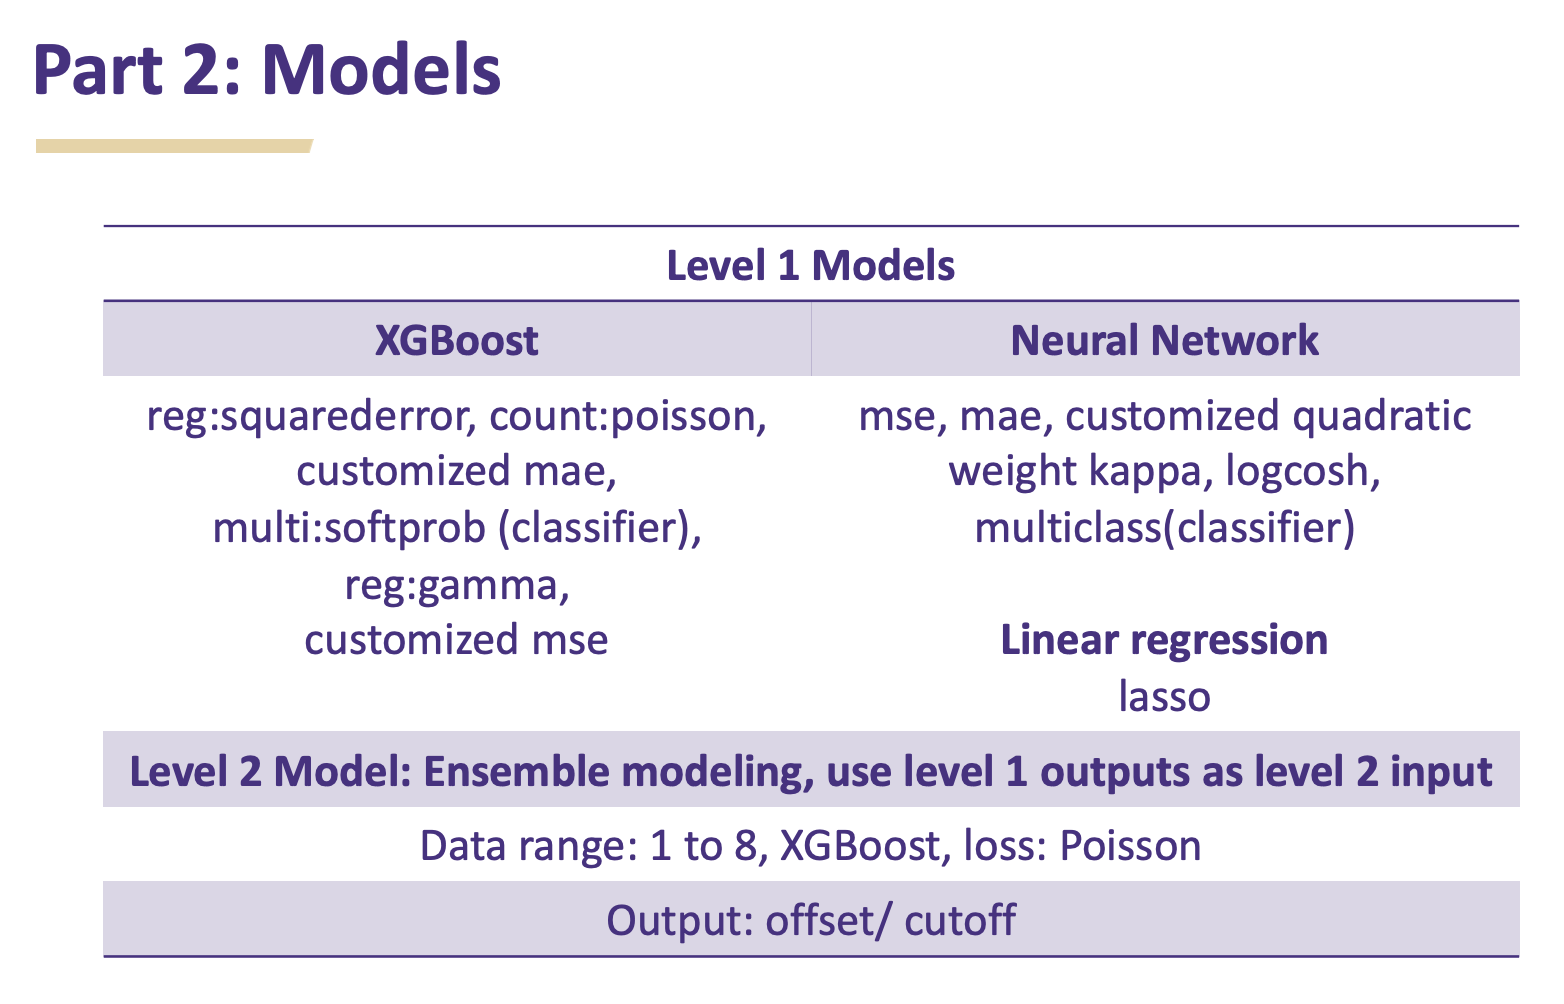

In [66]:
Image("part2.jpeg", width=800, height=400)

The following code will desmontrate the model structure and hyper-parameter adjustment with train set and validation set. Kappa score will be report as well for comparison. 

## Level 1 model

In [67]:
X_train.head()

,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,...,175,176,177,178,179,180,181,182,183,184
0,-0.207913,-0.096563,-0.227776,-0.123148,-0.092436,-0.113045,-0.118443,-0.104344,-0.080394,-0.196442,...,-0.255367,0.255367,0.069934,-0.069934,-0.303755,0.303755,-0.128959,0.128959,0.687027,-0.687027
1,4.809701,-0.096563,-0.227776,-0.123148,-0.092436,-0.113045,-0.118443,9.583699,-0.080394,-0.196442,...,-0.255367,0.255367,0.069934,-0.069934,-0.303755,0.303755,-0.128959,0.128959,-1.455546,1.455546
2,-0.207913,-0.096563,-0.227776,-0.123148,-0.092436,-0.113045,-0.118443,-0.104344,-0.080394,-0.196442,...,-0.255367,0.255367,0.069934,-0.069934,-0.303755,0.303755,-0.128959,0.128959,0.687027,-0.687027
3,-0.207913,-0.096563,-0.227776,-0.123148,-0.092436,-0.113045,-0.118443,-0.104344,-0.080394,-0.196442,...,-0.255367,0.255367,0.069934,-0.069934,-0.303755,0.303755,-0.128959,0.128959,0.687027,-0.687027
4,-0.207913,-0.096563,-0.227776,-0.123148,-0.092436,-0.113045,-0.118443,-0.104344,-0.080394,-0.196442,...,-0.255367,0.255367,0.069934,-0.069934,-0.303755,0.303755,-0.128959,0.128959,0.687027,-0.687027


In [68]:
import os
import numpy as np
import xgboost as xgb
from scipy.optimize import fmin_powell
from ml_metrics import quadratic_weighted_kappa

## (1) SGBoost: squarederror   
The data have been separated into three parts, train set, validation set and test set.  
Train set is used to train the model; validation set is used to adjust the hyper-parameters.  
I report the accuracy and kappa score for train set and validation set. The hyper-parameters are adjusted with the QWK. The accuracy is showed to confirm the difference between accuracy and QWK.      
In the following codes, I report the accuracy and kappa score of test set as well because I want to make sure that the ensemble model performance better than any single models. (Of course, the accuracy and kappa score of validation set also prove it.)   

**Parameter**   
(1) eta [default=0.3, alias: learning_rate]   
(2) max_depth [default=6]: larger, model will overfit  
(3) subsample: help to prevent overfit, smaller value helps better  
(4) objective: specify the learning task and the corresponding learning objective  
(5) xgb_num_rounds: The number of rounds for boosting  
(6) min_child_weight: minimum sum of instance weight (hessian) needed in a child   
(7) colsample_bytree: the subsample ratio of columns when constructing each tree  

**Parameter Adjustment Analysis**
(1) For parameter **max_depth**, if we use a small value such as 2 or 3, the model will underfit. As for a larger value of max_depth, it increases the running time significantly and make the model overfitted but it does not have obvious improvement on the model.   
(2) During the parameter adjustment, parameter **eta** and **xgb_num_rounds** have the most significant effect. Every time we use a smaller value of eta, we should use a larger value of xgb_num_rounds.   
(3) Parameter **min_child_weight, subsample and colsample_bytree** do not have obvious influence on model accuracy.  
   
The parameter adjustment for other XGBoost models are similar.

In [69]:
# parameter of sgb
def get_params():
    
    params = {}
    params["objective"] = "reg:squarederror"     
    params["eta"] = 0.1
    params["min_child_weight"] = 300
    params["subsample"] = 0.85
    params["colsample_bytree"] = 0.3
    # params["silent"] = 1
    params["max_depth"] = 7
    plst = list(params.items())

    return plst

xgb_num_rounds = 500
# convert data to xgb data structure
xgtrain = xgb.DMatrix(X_train, y_train)

plst = get_params()

# train model
model_mse = xgb.train(plst, xgtrain, xgb_num_rounds) 

(1) train set

In [70]:
train_preds_mse = model_mse.predict(xgtrain, ntree_limit=model_mse.best_iteration)
train_preds_mse

array([2.748436 , 7.6661744, 6.0913043, ..., 6.70748  , 7.431163 ,
       3.176116 ], dtype=float32)

In [71]:
predClipped = np.clip(np.round(train_preds_mse), 1, 8).astype(int)
(predClipped.reshape((-1)) == y_train).sum() / y_train.shape[0]

0.29156621076586825

In [72]:
# train set score
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_train, predClipped.reshape((-1)),weights= "quadratic")

0.6645989771098028

(2) validation set

In [73]:
xgval = xgb.DMatrix(X_val, y_val)
val_preds_mse = model_mse.predict(xgval, ntree_limit=model_mse.best_iteration)

predClipped = np.clip(np.round(val_preds_mse), 1, 8).astype(int)
(predClipped.reshape((-1)) == y_val).sum() / y_val.shape[0]

0.29588888888888887

In [74]:
# val set score
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_val, predClipped.reshape((-1)),weights= "quadratic")

0.5951534658231084

(3) test set

In [75]:
xgtest = xgb.DMatrix(X_test, y_test)
test_preds_mse = model_mse.predict(xgtest, ntree_limit=model_mse.best_iteration)

predClipped = np.clip(np.round(test_preds_mse), 1, 8).astype(int)
(predClipped.reshape((-1)) == y_test).sum() / y_test.shape[0]

0.2881666666666667

In [76]:
# test set score
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, predClipped.reshape((-1)),weights= "quadratic")

0.6019224282263036

## (2) minimize possion

In [77]:
def get_params():
    
    params = {}
    params["objective"] = "count:poisson"     
    params["eta"] = 0.1
    params["min_child_weight"] = 360
    params["subsample"] = 0.85
    params["colsample_bytree"] = 0.3
    params["max_depth"] = 7
    plst = list(params.items())

    return plst
xgb_num_rounds = 500

In [78]:
plst = get_params()
model_possion = xgb.train(plst, xgtrain, xgb_num_rounds)

(1) train set

In [79]:
train_preds_possion = model_possion.predict(xgtrain, ntree_limit=model_possion.best_iteration)
train_preds_possion

array([2.9139981, 7.6633134, 6.0504537, ..., 7.046712 , 7.8277874,
       2.9668984], dtype=float32)

In [80]:
predClipped = np.clip(np.round(train_preds_possion), 1, 8).astype(int)
(predClipped.reshape((-1)) == y_train).sum() / y_train.shape[0]

0.3057614745048557

In [81]:
# train set score
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_train, predClipped.reshape((-1)),weights= "quadratic")

0.6892600964776852

(2) validation set

In [82]:
xgval = xgb.DMatrix(X_val, y_val)
val_preds_possion = model_possion.predict(xgval, ntree_limit=model_mse.best_iteration)

predClipped = np.clip(np.round(val_preds_possion), 1, 8).astype(int)
(predClipped.reshape((-1)) == y_val).sum() / y_val.shape[0]

0.30955555555555553

In [83]:
# val set score
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_val, predClipped.reshape((-1)),weights= "quadratic")

0.609347907843365

(3) test set

In [84]:
xgtest = xgb.DMatrix(X_test, y_test)
test_preds_possion = model_possion.predict(xgtest, ntree_limit=model_possion.best_iteration)

predClipped = np.clip(np.round(test_preds_possion), 1, 8).astype(int)
(predClipped.reshape((-1)) == y_test).sum() / y_test.shape[0]

0.28933333333333333

In [85]:
# test set score
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, predClipped.reshape((-1)),weights= "quadratic")

0.617228270455662

## (3) minimize with mae

In [86]:
def get_params():
    
    params = {}  
    params["eta"] = 0.1
    params["min_child_weight"] = 360
    params["subsample"] = 0.85
    params["colsample_bytree"] = 0.3
    # params["silent"] = 1
    params["max_depth"] = 7
    plst = list(params.items())

    return plst
plst = get_params()
xgb_num_rounds = 700

def huber_approx_obj(preds, dtrain):
    d = preds - dtrain.get_label() #remove .get_labels() for sklearn
    h = 1  #h is delta in the graphic
    scale = 1 + (d / h) ** 2
    scale_sqrt = np.sqrt(scale)
    grad = d / scale_sqrt
    hess = 1 / scale / scale_sqrt
    return grad, hess

model_mae = xgb.train(plst, xgtrain, xgb_num_rounds, obj=huber_approx_obj) 

(1) train set

In [87]:
train_preds_mae = model_mae.predict(xgtrain, ntree_limit=model_mae.best_iteration)
train_preds_mae

array([3.0511029, 8.015667 , 6.1830764, ..., 6.484588 , 7.8446617,
       2.8880663], dtype=float32)

In [88]:
predClipped = np.clip(np.round(train_preds_mae), 1, 8).astype(int)
(predClipped.reshape((-1)) == y_train).sum() / y_train.shape[0]

0.4233793740564656

In [89]:
# train set score
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_train, predClipped.reshape((-1)),weights= "quadratic")

0.6148548462260229

(2) validation set

In [90]:
val_preds_mae = model_mae.predict(xgval, ntree_limit=model_mae.best_iteration)

predClipped = np.clip(np.round(val_preds_mae), 1, 8).astype(int)
(predClipped.reshape((-1)) == y_val).sum() / y_val.shape[0]

0.4111111111111111

In [91]:
cohen_kappa_score(y_val, predClipped.reshape((-1)),weights= "quadratic")

0.5705431177276974

(3) test set

In [92]:
xgtest = xgb.DMatrix(X_test, y_test)
test_preds_mae = model_mae.predict(xgtest, ntree_limit=model_mae.best_iteration)

predClipped = np.clip(np.round(test_preds_mae), 1, 8).astype(int)
(predClipped.reshape((-1)) == y_test).sum() / y_test.shape[0]

0.43116666666666664

In [93]:
# test set score
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, predClipped.reshape((-1)),weights= "quadratic")

0.5648250784160125

## (4) Multinomial Classification

In [94]:
def get_params():
    
    params = {}
    params["objective"] = "multi:softprob"     
    params["eta"] = 0.1
    params["min_child_weight"] = 360
    params["subsample"] = 0.85
    params["colsample_bytree"] = 0.3
    #params["silent"] = 1
    params["max_depth"] = 7
    params['num_class'] = 8
    plst = list(params.items())

    return plst
plst = get_params()
xgb_num_rounds = 500

In [95]:
y_train_classification = y_train - 1
y_test_classification = y_test - 1

xgtrain_classification = xgb.DMatrix(X_train, y_train_classification)
xgtest_classification = xgb.DMatrix(X_test, y_test_classification)

In [96]:
model_mul = xgb.train(plst, xgtrain_classification, xgb_num_rounds) 

(1) train set

In [97]:
train_preds_mul = model_mul.predict(xgtrain, ntree_limit=model_mul.best_iteration)
train_preds_mul

array([[1.31514385e-01, 1.44856691e-01, 2.84589678e-01, ...,
        2.78788526e-02, 3.28059234e-02, 4.68099397e-03],
       [1.11503070e-02, 1.49779152e-02, 4.53135290e-04, ...,
        4.80276793e-02, 7.63086379e-02, 8.37805331e-01],
       [1.26500065e-02, 3.60693671e-02, 4.84041125e-03, ...,
        7.49238014e-01, 1.06512234e-01, 2.02891361e-02],
       ...,
       [3.02222837e-02, 6.15054369e-02, 1.69587682e-03, ...,
        1.26412198e-01, 4.14886445e-01, 3.41830492e-01],
       [2.06303354e-02, 2.04957947e-02, 8.21006892e-04, ...,
        5.19033037e-02, 4.86321189e-02, 8.42383206e-01],
       [3.44857812e-01, 1.35252774e-01, 1.84589162e-01, ...,
        6.79309759e-03, 4.39002085e-03, 1.34270275e-02]], dtype=float32)

In [98]:
train_preds_mul = np.argmax(train_preds_mul, axis = 1) + 1
train_preds_mul

array([4, 8, 6, ..., 7, 8, 1])

In [99]:
# train set score
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(train_preds_mul, y_train,weights= "quadratic")

0.5549051019254512

(2) validation set

In [100]:
y_val_classification = y_val - 1

xgval_classification = xgb.DMatrix(X_val, y_val_classification)
val_preds_mul = model_mul.predict(xgval_classification, ntree_limit=model_mul.best_iteration)

In [101]:
val_preds_mul = np.argmax(val_preds_mul, axis = 1) + 1
cohen_kappa_score(val_preds_mul, y_val,weights= "quadratic")

0.525426656487753

(3) test set

In [102]:
# test set
test_preds_mul = model_mul.predict(xgtest_classification, ntree_limit=model_mul.best_iteration)

In [103]:
test_preds_mul = np.argmax(test_preds_mul, axis = 1) + 1
cohen_kappa_score(test_preds_mul, y_test,weights= "quadratic")

0.5151123006245226

## (5) Gamma distribution

In [104]:
def get_params():
    
    params = {}
    params["objective"] = "reg:gamma"     
    params["eta"] = 0.1
    params["min_child_weight"] = 360
    params["subsample"] = 0.85
    params["colsample_bytree"] = 0.3
    #params["silent"] = 1
    params["max_depth"] = 7
    #params['num_class'] = 8
    plst = list(params.items())

    return plst
plst = get_params()
xgb_num_rounds = 500

model_gamma = xgb.train(plst, xgtrain, xgb_num_rounds)

(1) train set

In [105]:
train_preds_gamma = model_gamma.predict(xgtrain, ntree_limit=model_gamma.best_iteration)
train_preds_gamma

array([2.8656278, 7.997809 , 6.2060747, ..., 6.2620387, 7.4896183,
       3.2327797], dtype=float32)

In [106]:
predClipped = np.clip(np.round(train_preds_gamma), 1, 8).astype(int)
(predClipped.reshape((-1)) == y_train).sum() / y_train.shape[0]

0.2887046258534057

In [107]:
# train set score
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_train, predClipped.reshape((-1)),weights= "quadratic")

0.6562288458670964

(2) validation set

In [108]:
val_preds_gamma = model_gamma.predict(xgval, ntree_limit=model_gamma.best_iteration)

predClipped = np.clip(np.round(val_preds_gamma), 1, 8).astype(int)
(predClipped.reshape((-1)) == y_val).sum() / y_test.shape[0]

0.447

In [109]:
cohen_kappa_score(y_val, predClipped.reshape((-1)),weights= "quadratic")

0.5997443156945064

(3) test set

In [110]:
xgtest = xgb.DMatrix(X_test, y_test)
test_preds_gamma = model_gamma.predict(xgtest, ntree_limit=model_gamma.best_iteration)

predClipped = np.clip(np.round(test_preds_gamma), 1, 8).astype(int)
(predClipped.reshape((-1)) == y_test).sum() / y_test.shape[0]

0.29733333333333334

In [111]:
# test set score
cohen_kappa_score(y_test, predClipped.reshape((-1)),weights= "quadratic")

0.6100002784397787

## (6) customized: se

In [112]:
def custom_se(preds, dtrain):
    d = preds - dtrain.get_label()
    grad = 2*d
    length = len(grad)
    hess = 2 * np.ones(length)
    return grad, hess

def get_params():
    
    params = {}
    # params["objective"] = "reg:squarederror"     
    params["eta"] = 0.1
    params["min_child_weight"] = 360
    params["subsample"] = 0.85
    params["colsample_bytree"] = 0.3
    # params["silent"] = 1
    params["max_depth"] = 7
    #params['num_class'] = 8
    plst = list(params.items())

    return plst
plst = get_params()
xgb_num_rounds = 500

model_mse = xgb.train(plst, xgtrain, xgb_num_rounds, obj=custom_se)

(1) train set

In [113]:
train_preds_cse = model_mse.predict(xgtrain, ntree_limit=model_mse.best_iteration)
train_preds_cse

array([2.8524323, 7.815527 , 6.0300913, ..., 6.7546587, 7.824523 ,
       3.5165102], dtype=float32)

In [114]:
predClipped = np.clip(np.round(train_preds_cse), 1, 8).astype(int)
(predClipped.reshape((-1)) == y_train).sum() / y_train.shape[0]

0.3053108312115545

In [115]:
cohen_kappa_score(y_train, predClipped.reshape((-1)),weights= "quadratic")

0.6865542842718606

(2) validation set

In [116]:
val_preds_cse = model_mse.predict(xgval, ntree_limit=model_mse.best_iteration)

predClipped = np.clip(np.round(val_preds_cse), 1, 8).astype(int)
(predClipped.reshape((-1)) == y_val).sum() / y_test.shape[0]

0.47533333333333333

In [117]:
cohen_kappa_score(y_val, predClipped.reshape((-1)),weights= "quadratic")

0.6025363305572684

(3) test set

In [118]:
xgtest = xgb.DMatrix(X_test, y_test)
test_preds_cse = model_mse.predict(xgtest, ntree_limit=model_mse.best_iteration)

predClipped = np.clip(np.round(test_preds_cse), 1, 8).astype(int)
(predClipped.reshape((-1)) == y_test).sum() / y_test.shape[0]

0.29633333333333334

In [119]:
cohen_kappa_score(y_test, predClipped.reshape((-1)),weights= "quadratic")

0.6102851161458835

## Linear model

In [120]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)
train_preds_lasso = clf.predict(X_train)
val_preds_lasso = clf.predict(X_val)
test_preds_lasso = clf.predict(X_test)

In [121]:
predClipped = np.clip(np.round(train_preds_lasso), 1, 8).astype(int)
(predClipped.reshape((-1)) == y_train).sum() / y_train.shape[0]

0.167368919132061

In [122]:
cohen_kappa_score(y_train, predClipped.reshape((-1)),weights= "quadratic")

0.4620855113024621

(2) validation set

In [123]:
predClipped = np.clip(np.round(val_preds_lasso), 1, 8).astype(int)
(predClipped.reshape((-1)) == y_val).sum() / y_val.shape[0]

0.16544444444444445

In [124]:
cohen_kappa_score(y_val, predClipped.reshape((-1)),weights= "quadratic")

0.44788531935511533

(3) test set

In [125]:
predClipped = np.clip(np.round(test_preds_lasso), 1, 8).astype(int)
(predClipped.reshape((-1)) == y_test).sum() / y_test.shape[0]

0.16166666666666665

In [126]:
cohen_kappa_score(y_test, predClipped.reshape((-1)),weights= "quadratic")

0.4526796471383058

## Neural Network 

In this part, theres are 6 neural network models with different loss functions, including mse, mae, logcosh, multi-class and customized QWK. Among them, only the neural network with multi-class loss function is a classifer model.  

**NN structure**  
5 hidden layers: 300, 300, 300, 300, 100  
Relu activation with he_normal initializer   
BatchNormalization and Dropout for every hidden layer   
Adam optimizer with regulation parameter (beta_1 and beta_2)     
Early stopping and autosave   

**Parameter adjustment**  
(1) activation function: I compared several activation functions including relu, selu, sigmoid and tanh, relu performs the best among them.   
(2) hidden layers: I used 5 hidden layers here because if I increase it to 6 or more, the running time of each epoch will increase significantly (from 6s to 9s) but the kappa score almost the same.      
(3) optimizer: I compared several optimizers including Adam, Nadam and SGD. Adam optimzer is the best one among them. The value of beta_1 and beta_2 do not make significant difference.   

Similarly as the models of SGBoost, I report the accuracy score and quadratic weighted kappa for each dataset.

## (1) mse

In [127]:
import tensorflow as tf
from tensorflow import keras

def reset_session(seed = 42):
    tf.random.set_seed(seed)
    np.random.seed(seed)
    tf.keras.backend.clear_session()
    
shape = X_train.shape[1]
reset_session()

model = keras.models.Sequential()
model.add(keras.layers.Dense(300, activation = "relu", input_shape = (shape,), kernel_initializer="he_normal"))



for n_hidden in (300, 300, 300, 100):
    model.add(keras.layers.Dense(n_hidden, activation = "relu", kernel_initializer = "he_normal"))
    keras.layers.BatchNormalization()
    model.add(keras.layers.Dropout(rate=0.2))
    
model.add(keras.layers.Dense(1, kernel_initializer="he_normal"))
optimizer = keras.optimizers.Adam(lr = 0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss = "mse", optimizer = optimizer)
#checkpoint_cb = keras.callbacks.ModelCheckpoint("bestsave.h5", save_best_only=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("autosave.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,min_delta=0.001, restore_best_weights=True)

model.fit(X_train, y_train, epochs = 100, validation_data=(X_val, y_val),
          batch_size = 32, verbose = 1, callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
1387/1387 [==============================] - 5s 4ms/step - loss: 5.2322 - val_loss: 4.3769
Epoch 2/100
1387/1387 [==============================] - 5s 4ms/step - loss: 4.2318 - val_loss: 4.3082
Epoch 3/100
1387/1387 [==============================] - 5s 4ms/step - loss: 3.9240 - val_loss: 3.8740
Epoch 4/100
1387/1387 [==============================] - 5s 4ms/step - loss: 3.6947 - val_loss: 4.3327
Epoch 5/100
1387/1387 [==============================] - 5s 4ms/step - loss: 3.5753 - val_loss: 3.8905
Epoch 6/100
1387/1387 [==============================] - 5s 3ms/step - loss: 3.4227 - val_loss: 3.8053
Epoch 7/100
1387/1387 [==============================] - 5s 4ms/step - loss: 3.2870 - val_loss: 3.8827
Epoch 8/100
1387/1387 [==============================] - 5s 4ms/step - loss: 3.1939 - val_loss: 4.1638
Epoch 9/100
1387/1387 [==============================] - 5s 4ms/step - loss: 3.0736 - val_loss: 3.8922
Epoch 10/100
1387/1387 [==============================] - 5s 4ms/step - l

(1) train set

In [128]:
train_preds_NN_mse = model.predict(X_train)
predClipped = np.clip(np.round(train_preds_NN_mse), 1, 8).astype(int)
(predClipped.reshape((-1)) == y_train).sum() / y_train.shape[0]

0.2073635114125414

In [129]:
cohen_kappa_score(y_train, predClipped.reshape((-1)),weights= "quadratic")

0.6323969764359714

(2) validation set

In [130]:
val_preds_NN_mse = model.predict(X_val)
predClipped = np.clip(np.round(val_preds_NN_mse), 1, 8).astype(int)
(predClipped.reshape((-1)) == y_val).sum() / y_val.shape[0]

0.19311111111111112

In [131]:
cohen_kappa_score(y_val, predClipped.reshape((-1)),weights= "quadratic")

0.5418821100336714

(3) test set

In [132]:
test_preds_NN_mse = model.predict(X_test)
predClipped = np.clip(np.round(test_preds_NN_mse), 1, 8).astype(int)
(predClipped.reshape((-1)) == y_test).sum() / y_test.shape[0]

0.19

In [133]:
cohen_kappa_score(y_test, predClipped.reshape((-1)),weights= "quadratic")

0.540504965613227

## (2) MAE

In [134]:
import tensorflow as tf
from tensorflow import keras

def reset_session(seed = 42):
    tf.random.set_seed(seed)
    np.random.seed(seed)
    tf.keras.backend.clear_session()
    
shape = X_train.shape[1]
reset_session()

model = keras.models.Sequential()
model.add(keras.layers.Dense(300, activation = "relu", input_shape = (shape,), kernel_initializer="he_normal"))



for n_hidden in (300, 300, 300, 100):
    model.add(keras.layers.Dense(n_hidden, activation = "relu", kernel_initializer = "he_normal"))
    keras.layers.BatchNormalization()
    model.add(keras.layers.Dropout(rate=0.2))
    
model.add(keras.layers.Dense(1, kernel_initializer="he_normal"))
optimizer = keras.optimizers.Adam(lr = 0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss = "mae", optimizer = optimizer)
checkpoint_cb = keras.callbacks.ModelCheckpoint("autosave.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,min_delta=0.001, restore_best_weights=True)

model.fit(X_train, y_train, epochs = 100, validation_data=(X_val, y_val),
          batch_size = 32, verbose = 1, callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
1387/1387 [==============================] - 6s 4ms/step - loss: 1.7766 - val_loss: 1.4536
Epoch 2/100
1387/1387 [==============================] - 5s 3ms/step - loss: 1.5582 - val_loss: 1.7056
Epoch 3/100
1387/1387 [==============================] - 5s 3ms/step - loss: 1.4550 - val_loss: 1.4659
Epoch 4/100
1387/1387 [==============================] - 5s 3ms/step - loss: 1.3822 - val_loss: 1.4544
Epoch 5/100
1387/1387 [==============================] - 5s 4ms/step - loss: 1.3365 - val_loss: 1.3544
Epoch 6/100
1387/1387 [==============================] - 6s 4ms/step - loss: 1.3022 - val_loss: 1.3365
Epoch 7/100
1387/1387 [==============================] - 6s 4ms/step - loss: 1.2765 - val_loss: 1.3397
Epoch 8/100
1387/1387 [==============================] - 6s 4ms/step - loss: 1.2612 - val_loss: 1.3451
Epoch 9/100
1387/1387 [==============================] - 6s 4ms/step - loss: 1.2379 - val_loss: 1.2971
Epoch 10/100
1387/1387 [==============================] - 6s 4ms/step - l

(1) train set

In [135]:
train_preds_NN_mae = model.predict(X_train)
predClipped = np.clip(np.round(train_preds_NN_mae), 1, 8).astype(int)
(predClipped.reshape((-1)) == y_train).sum() / y_train.shape[0]

0.5081003131970888

In [136]:
cohen_kappa_score(y_train, predClipped.reshape((-1)),weights= "quadratic")

0.6530074639234453

(2) validation set

In [137]:
val_preds_NN_mae = model.predict(X_val)
predClipped = np.clip(np.round(val_preds_NN_mae), 1, 8).astype(int)
(predClipped.reshape((-1)) == y_val).sum() / y_val.shape[0]

0.4637777777777778

In [138]:
cohen_kappa_score(y_val, predClipped.reshape((-1)),weights= "quadratic")

0.5839187493840208

(3) test set

In [139]:
test_preds_NN_mae = model.predict(X_test)
predClipped = np.clip(np.round(test_preds_NN_mae), 1, 8).astype(int)
(predClipped.reshape((-1)) == y_test).sum() / y_test.shape[0]

0.473

In [140]:
cohen_kappa_score(y_test, predClipped.reshape((-1)),weights= "quadratic")

0.5768528152797008

## (3) customized: QWK  
The customized QWK function is copied from stackoverflow.   
https://stackoverflow.com/questions/58979824/how-to-do-cohen-kappa-quadratic-loss-in-tensorflow-2-0  
Reminders: tf.contrib.metrics.cohen_kappa no longer exists.  

In [141]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y_train_onehot = enc.fit_transform(y_train.to_numpy()[:, None]).toarray()
y_val_onehot = enc.fit_transform(y_val.to_numpy()[:, None]).toarray()
y_test_onehot = enc.fit_transform(y_test.to_numpy()[:, None]).toarray()

In [142]:
# https://stackoverflow.com/questions/58979824/how-to-do-cohen-kappa-quadratic-loss-in-tensorflow-2-0

def kappa_loss(y_pred, y_true, y_pow=2, eps=1e-10, N=8, bsize=256, name='kappa'):
    """
    A continuous differentiable approximation of discrete kappa loss.
        Args:
            y_pred: 2D tensor or array, [batch_size, num_classes]
            y_true: 2D tensor or array,[batch_size, num_classes]
            y_pow: int,  e.g. y_pow=2
            N: typically num_classes of the model
            bsize: batch_size of the training or validation ops
            eps: a float, prevents divide by zero
            name: Optional scope/name for op_scope.
        Returns:
            A tensor with the kappa loss.
    """

    with tf.name_scope(name):
        y_true = tf.cast(y_true,dtype='float')
        repeat_op = tf.cast(tf.tile(tf.reshape(tf.range(0, N), [N, 1]), [1, N]), dtype='float')
        repeat_op_sq = tf.square((repeat_op - tf.transpose(repeat_op)))
        weights = repeat_op_sq / tf.cast((N - 1) ** 2, dtype='float')

        pred_ = y_pred ** y_pow
        try:
            pred_norm = pred_ / (eps + tf.reshape(tf.reduce_sum(pred_, 1), [-1, 1]))
        except Exception:
            pred_norm = pred_ / (eps + tf.reshape(tf.reduce_sum(pred_, 1), [bsize, 1]))

        hist_rater_a = tf.reduce_sum(pred_norm, 0)
        hist_rater_b = tf.reduce_sum(y_true, 0)

        conf_mat = tf.matmul(tf.transpose(pred_norm), y_true)

        nom = tf.reduce_sum(weights * conf_mat)
        denom = tf.reduce_sum(weights * tf.matmul(
            tf.reshape(hist_rater_a, [N, 1]), tf.reshape(hist_rater_b, [1, N])) /
                              tf.cast(bsize, dtype='float'))

        return nom / (denom + eps)

In [143]:
shape = X_train.shape[1]
reset_session()

model = keras.models.Sequential()
model.add(keras.layers.Dense(300, activation = "relu", input_shape = (shape,), kernel_initializer="he_normal"))



for n_hidden in (300, 300, 300, 100):
    model.add(keras.layers.Dense(n_hidden, activation = "relu", kernel_initializer = "he_normal"))
    keras.layers.BatchNormalization()
    model.add(keras.layers.Dropout(rate=0.2))
    
model.add(keras.layers.Dense(8, activation = "softmax"))
optimizer = keras.optimizers.Adam(lr = 0.0001, beta_1=0.9, beta_2=0.999)

# compile model
model.compile(loss = kappa_loss, optimizer = optimizer)

checkpoint_cb = keras.callbacks.ModelCheckpoint("autosave.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,min_delta=0.001, restore_best_weights=True)

model.fit(X_train, y_train_onehot, epochs = 100, validation_data=(X_val, y_val_onehot),
          batch_size = 32, verbose = 1, callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
1387/1387 [==============================] - 6s 4ms/step - loss: 4.7887 - val_loss: 3.7166
Epoch 2/100
1387/1387 [==============================] - 6s 4ms/step - loss: 3.6778 - val_loss: 3.5209
Epoch 3/100
1387/1387 [==============================] - 6s 4ms/step - loss: 3.4672 - val_loss: 3.4459
Epoch 4/100
1387/1387 [==============================] - 7s 5ms/step - loss: 3.3463 - val_loss: 3.4127
Epoch 5/100
1387/1387 [==============================] - 6s 5ms/step - loss: 3.2775 - val_loss: 3.3475
Epoch 6/100
1387/1387 [==============================] - 5s 4ms/step - loss: 3.2551 - val_loss: 3.3494
Epoch 7/100
1387/1387 [==============================] - 5s 3ms/step - loss: 3.1891 - val_loss: 3.3616
Epoch 8/100
1387/1387 [==============================] - 6s 4ms/step - loss: 3.1674 - val_loss: 3.3612
Epoch 9/100
1387/1387 [==============================] - 7s 5ms/step - loss: 3.1201 - val_loss: 3.3107
Epoch 10/100
1387/1387 [==============================] - 7s 5ms/step - l

(1) train set

In [144]:
train_preds_NN_qwk = model.predict(X_train)
train_preds_NN_qwk = enc.inverse_transform(train_preds_NN_qwk)

In [145]:
(train_preds_NN_qwk.squeeze() == y_train).sum()/y_train.shape[0]

0.41024312205673596

In [146]:
cohen_kappa_score(y_train, train_preds_NN_qwk.squeeze(),weights= "quadratic")

0.6386981083512155

(2) validation set

In [147]:
val_preds_NN_qwk = model.predict(X_val)
val_preds_NN_qwk = enc.inverse_transform(val_preds_NN_qwk)
(val_preds_NN_qwk.squeeze() == y_val).sum()/y_val.shape[0]

0.4007777777777778

In [148]:
cohen_kappa_score(y_val, val_preds_NN_qwk.squeeze(),weights= "quadratic")

0.5996099944789373

(3) test set

In [149]:
test_preds_NN_qwk = model.predict(X_test)
test_preds_NN_qwk = enc.inverse_transform(test_preds_NN_qwk)
(test_preds_NN_qwk.squeeze() == y_test).sum()/y_test.shape[0]

0.39766666666666667

In [150]:
cohen_kappa_score(y_test, test_preds_NN_qwk.squeeze(),weights= "quadratic")

0.5918716330634208

In [151]:
train_preds_NN_qwk = train_preds_NN_qwk.squeeze()
val_preds_NN_qwk = val_preds_NN_qwk.squeeze()
test_preds_NN_qwk = test_preds_NN_qwk.squeeze()

## (4)logcosh

In [152]:
def reset_session(seed = 42):
    tf.random.set_seed(seed)
    np.random.seed(seed)
    tf.keras.backend.clear_session()
    
shape = X_train.shape[1]
reset_session()

model = keras.models.Sequential()
model.add(keras.layers.Dense(300, activation = "relu", input_shape = (shape,), kernel_initializer="he_normal"))



for n_hidden in (300, 300, 300, 100):
    model.add(keras.layers.Dense(n_hidden, activation = "relu", kernel_initializer = "he_normal"))
    keras.layers.BatchNormalization()
    model.add(keras.layers.Dropout(rate=0.2))
    
model.add(keras.layers.Dense(1, kernel_initializer="he_normal"))
optimizer = keras.optimizers.Adam(lr = 0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss = "logcosh", optimizer = optimizer)
checkpoint_cb = keras.callbacks.ModelCheckpoint("autosave.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,min_delta=0.001, restore_best_weights=True)

model.fit(X_train, y_train, epochs = 100, validation_data=(X_val, y_val),
          batch_size = 32, verbose = 1, callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
1387/1387 [==============================] - 5s 4ms/step - loss: 1.2032 - val_loss: 1.0136
Epoch 2/100
1387/1387 [==============================] - 5s 4ms/step - loss: 1.0218 - val_loss: 1.1655
Epoch 3/100
1387/1387 [==============================] - 5s 4ms/step - loss: 0.9421 - val_loss: 0.9127
Epoch 4/100
1387/1387 [==============================] - 5s 4ms/step - loss: 0.8901 - val_loss: 1.0362
Epoch 5/100
1387/1387 [==============================] - 5s 4ms/step - loss: 0.8613 - val_loss: 0.8718
Epoch 6/100
1387/1387 [==============================] - 5s 4ms/step - loss: 0.8316 - val_loss: 0.9100
Epoch 7/100
1387/1387 [==============================] - 6s 5ms/step - loss: 0.8075 - val_loss: 0.8759
Epoch 8/100
1387/1387 [==============================] - 6s 4ms/step - loss: 0.7919 - val_loss: 0.8895
Epoch 9/100
1387/1387 [==============================] - 6s 5ms/step - loss: 0.7690 - val_loss: 0.8725
Epoch 10/100
1387/1387 [==============================] - 6s 4ms/step - l

(1) train set

In [153]:
train_preds_NN_log = model.predict(X_train)
predClipped = np.clip(np.round(train_preds_NN_log), 1, 8).astype(int)
(predClipped.reshape((-1)) == y_train).sum() / y_train.shape[0]

0.4737838264122034

In [154]:
cohen_kappa_score(y_train, predClipped.reshape((-1)),weights= "quadratic")

0.701251979448068

(2) validation set

In [155]:
val_preds_NN_log = model.predict(X_val)
predClipped = np.clip(np.round(val_preds_NN_log), 1, 8).astype(int)
(predClipped.reshape((-1)) == y_val).sum() / y_val.shape[0]

0.41144444444444445

In [156]:
cohen_kappa_score(y_val, predClipped.reshape((-1)),weights= "quadratic")

0.5893058752221276

(3) test set

In [157]:
test_preds_NN_log = model.predict(X_test)
predClipped = np.clip(np.round(test_preds_NN_log), 1, 8).astype(int)
(predClipped.reshape((-1)) == y_test).sum() / y_test.shape[0]

0.42083333333333334

In [158]:
cohen_kappa_score(y_test, predClipped.reshape((-1)),weights= "quadratic")

0.576781083850543

## (6) multinomial  
The number of hidden layers is 6. When the number of the hidden layer increases from 5 to 6, the kappa score of train set almost do not change but the kappa score of validation set increase a little (from 0.531 to 0.548).

In [159]:
reset_session()

y_train_NN_multinomial = y_train - 1
y_val_NN_multinomial = y_val - 1
y_test_NN_multinomial = y_test - 1

model = keras.models.Sequential()
model.add(keras.layers.Dense(300, activation = "relu", input_shape = (shape,), kernel_initializer="he_normal"))

for n_hidden in (300,300, 300, 300, 100):
    model.add(keras.layers.Dense(n_hidden, activation = "relu", kernel_initializer = "he_normal"))
    keras.layers.BatchNormalization()
    model.add(keras.layers.Dropout(rate=0.2))
    
#model.add(keras.layers.Dense(1, kernel_initializer="he_normal"))
model.add(keras.layers.Dense(8, activation = "softmax", kernel_initializer="he_normal"))
optimizer = keras.optimizers.Adam(lr = 0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer)

checkpoint_cb = keras.callbacks.ModelCheckpoint("autosave.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,min_delta=0.001, restore_best_weights=True)

model.fit(X_train, y_train_NN_multinomial, epochs = 100, validation_data=(X_val, y_val_NN_multinomial),
          batch_size = 32, verbose = 1, callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
1387/1387 [==============================] - 6s 5ms/step - loss: 1.5615 - val_loss: 1.3977
Epoch 2/100
1387/1387 [==============================] - 8s 6ms/step - loss: 1.3767 - val_loss: 1.3372
Epoch 3/100
1387/1387 [==============================] - 9s 7ms/step - loss: 1.3258 - val_loss: 1.3062
Epoch 4/100
1387/1387 [==============================] - 6s 4ms/step - loss: 1.2910 - val_loss: 1.3380
Epoch 5/100
1387/1387 [==============================] - 6s 4ms/step - loss: 1.2681 - val_loss: 1.2961
Epoch 6/100
1387/1387 [==============================] - 6s 4ms/step - loss: 1.2434 - val_loss: 1.2987
Epoch 7/100
1387/1387 [==============================] - 6s 4ms/step - loss: 1.2267 - val_loss: 1.3141
Epoch 8/100
1387/1387 [==============================] - 6s 4ms/step - loss: 1.2089 - val_loss: 1.3107
Epoch 9/100
1387/1387 [==============================] - 6s 4ms/step - loss: 1.1898 - val_loss: 1.3098
Epoch 10/100
1387/1387 [==============================] - 6s 4ms/step - l

(1) train set

In [160]:
train_preds_NN_mul = model.predict(X_train)
train_preds_NN_mul = np.argmax(train_preds_NN_mul, axis = 1)
(train_preds_NN_mul == y_train_NN_multinomial).sum() / y_train.shape[0]

0.5755390820396116

In [161]:
train_preds_NN_mul = train_preds_NN_mul + 1
cohen_kappa_score(y_train, train_preds_NN_mul,weights= "quadratic")

0.5850010312504151

(2) validation set

In [162]:
val_preds_NN_mul = model.predict(X_val)
val_preds_NN_mul = np.argmax(val_preds_NN_mul, axis = 1)
(val_preds_NN_mul == y_val_NN_multinomial).sum() / y_val.shape[0]

0.5306666666666666

In [163]:
val_preds_NN_mul = val_preds_NN_mul + 1
cohen_kappa_score(y_val, val_preds_NN_mul,weights= "quadratic")

0.5489497586803083

(3) test set

In [164]:
test_preds_NN_mul = model.predict(X_test)
test_preds_NN_mul = np.argmax(test_preds_NN_mul, axis = 1)
(test_preds_NN_mul == y_test_NN_multinomial).sum() / y_test.shape[0]

0.5316666666666666

In [165]:
test_preds_NN_mul = test_preds_NN_mul + 1
cohen_kappa_score(y_test, test_preds_NN_mul,weights= "quadratic")

0.5394097843089869

## Level 1 model result

Level 1 model result:


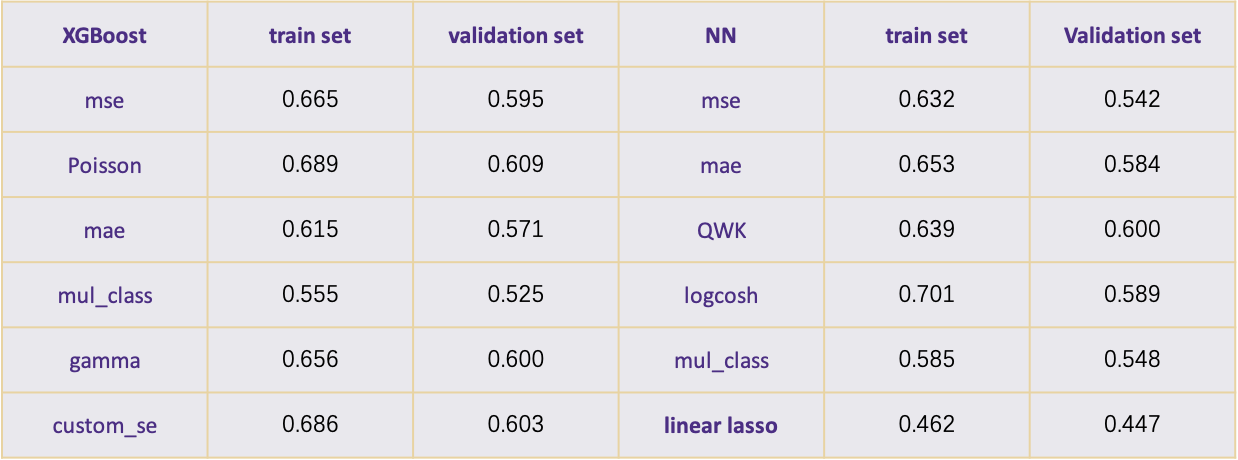

In [166]:
print("Level 1 model result:")
Image("level1_result.png", width=800, height=400)

**Conclusions**  
(1) XGBoost model with mul_class is the worst among 6 XGBoost model;  
(2) Neural network with mul_class is the worst among 5 neural network model;   
(3) It also explains why I will include regressor models for this competition.  
(4) Most of these models are overfitted but if model complexity is reduced, the validation set will perform worse. The main task is to get the highest kappa score in this competition so the overfit problem is neglected temporarily.  
(5) Linear regression model is the worst model among 12 models but it can explain some linear relationship of features.   
(6) According to the kappa score of validation set, XGBoost model with Poisson performs the best so level 2 model uses XGBoost model with Poisson as well.     
(7) Accuracy VS QWK: both accuracy and kappa score are reported for every dataset and every model. Compared the accuracy and kappa score, accuracy is much less than kappa score for most of the model, except the classifier model. Kappa score and accuracy of classifier are similar. The reason is that the principle of classifier model is similar as accuracy but regressor model will care more about the difference of labels are prediction value, which QWK will consider as well. It also explains why regressor models are included for this "classification problem".

## Part 2: Model Ensembling
use outputs from part 1 as inputs of part 2 model (XGBoost with possion loss function)

In [167]:
df_test = []
df_test = pd.DataFrame({"train_preds_mse": np.clip(test_preds_mse, 1, 8),
                        "train_preds_possion": np.clip(test_preds_possion, 1,8),
                        "train_preds_mae": np.clip(test_preds_mae, 1, 8),
                        "train_preds_mul": np.clip(test_preds_mul, 1, 8), 
                        "train_preds_gamma": np.clip(test_preds_gamma, 1, 8),
                        #"train_preds_se": np.clip(test_preds_mse, 1, 8),
                        "train_preds_cse":np.clip(test_preds_cse, 1, 8),
                        "train_preds_lasso": np.clip(test_preds_lasso, 1, 8), 
                        "train_preds_NN_mse": np.clip(test_preds_NN_mse.squeeze(), 1, 8),
                        "train_preds_NN_mae": np.clip(test_preds_NN_mae.squeeze(), 1, 8),
                        "train_preds_NN_qwk": np.clip(test_preds_NN_qwk.squeeze(), 1, 8),
                        "train_preds_NN_log": np.clip(test_preds_NN_log.squeeze(), 1, 8),
                        "train_preds_NN_mul": np.clip(test_preds_NN_mul.squeeze(), 1, 8),
                        "Response": y_test})

In [168]:
df_val = []
df_val = pd.DataFrame({"train_preds_mse": np.clip(val_preds_mse, 1, 8),
                        "train_preds_possion": np.clip(val_preds_possion, 1,8),
                        "train_preds_mae": np.clip(val_preds_mae, 1, 8),
                        "train_preds_mul": np.clip(val_preds_mul, 1, 8), 
                        "train_preds_gamma": np.clip(val_preds_gamma, 1, 8),
                        #"train_preds_se": np.clip(test_preds_mse, 1, 8),
                        "train_preds_cse":np.clip(val_preds_cse, 1, 8),
                        "train_preds_lasso": np.clip(val_preds_lasso, 1, 8), 
                        "train_preds_NN_mse": np.clip(val_preds_NN_mse.squeeze(), 1, 8),
                        "train_preds_NN_mae": np.clip(val_preds_NN_mae.squeeze(), 1, 8),
                        "train_preds_NN_qwk": np.clip(val_preds_NN_qwk.squeeze(), 1, 8),
                        "train_preds_NN_log": np.clip(val_preds_NN_log.squeeze(), 1, 8),
                        "train_preds_NN_mul": np.clip(val_preds_NN_mul.squeeze(), 1, 8),
                        "Response": y_val})

In [169]:
df_train = []
df_train = pd.DataFrame({"train_preds_mse": np.clip(train_preds_mse, 1, 8),
                        "train_preds_possion": np.clip(train_preds_possion, 1, 8),
                        "train_preds_mae": np.clip(train_preds_mae, 1, 8),
                        "train_preds_mul": np.clip(train_preds_mul, 1, 8), 
                        "train_preds_gamma": np.clip(train_preds_gamma, 1, 8),
                        #"train_preds_se": np.clip(train_preds_se, 1, 8),
                        "train_preds_cse": np.clip(train_preds_cse, 1, 8),
                        "train_preds_lasso": np.clip(train_preds_lasso, 1, 8), 
                        "train_preds_NN_mse": np.clip(train_preds_NN_mse.squeeze(), 1, 8),
                        "train_preds_NN_mae": np.clip(train_preds_NN_mae.squeeze(), 1, 8),
                        "train_preds_NN_qwk": np.clip(train_preds_NN_qwk.squeeze(), 1, 8),
                        "train_preds_NN_log": np.clip(train_preds_NN_log.squeeze(), 1, 8),
                        "train_preds_NN_mul": np.clip(train_preds_NN_mul.squeeze(), 1, 8),
                        "Response": y_train})
df_train

,train_preds_mse,train_preds_possion,train_preds_mae,train_preds_mul,train_preds_gamma,train_preds_cse,train_preds_lasso,train_preds_NN_mse,train_preds_NN_mae,train_preds_NN_qwk,train_preds_NN_log,train_preds_NN_mul,Response
7047,2.748436,2.913998,3.051103,4,2.865628,2.852432,4.262568,3.683661,3.042774,2.0,3.547748,3,2
19682,7.666174,7.663313,8.000000,8,7.997809,7.815527,6.694479,6.637364,7.786749,8.0,7.674706,8,8
14710,6.091304,6.050454,6.183076,6,6.206075,6.030091,5.742839,5.656458,5.958584,5.0,5.913110,6,6
3570,7.391663,7.324262,7.881331,8,7.658274,7.306071,6.697352,6.799969,7.942331,8.0,7.824778,8,7
5348,5.823841,5.677443,5.650826,6,5.649708,5.890423,5.719609,5.798551,6.108045,6.0,5.664500,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8437,5.104655,5.349463,5.674956,5,5.299557,5.239134,6.028924,6.209778,6.848187,8.0,7.327179,8,5
49695,7.012338,7.173079,7.481863,8,7.093866,6.873325,6.687714,7.058037,7.854286,8.0,7.192733,8,8
20999,6.707480,7.046712,6.484588,7,6.262039,6.754659,6.370880,6.416543,7.324946,8.0,7.495852,7,7
13118,7.431163,7.827787,7.844662,8,7.489618,7.824523,7.145142,7.321821,8.000000,8.0,7.735130,8,8


In [170]:
df_train.to_csv("df_train_final.csv", index = False)
df_val.to_csv("df_val_final.csv", index = False)
df_test.to_csv("df_test_final.csv", index = False)

In [171]:
df_train = pd.read_csv("df_train_final.csv")
df_val = pd.read_csv("df_val_final.csv")
df_test = pd.read_csv("df_test_final.csv")

In [172]:
y_train = df_train["Response"]
y_val = df_val["Response"]
y_test = df_test["Response"]

df_train = df_train.drop("Response", axis = 1)
df_val = df_val.drop("Response", axis = 1)
df_test = df_test.drop("Response", axis = 1)

In [173]:
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(df_train)
df_train = pd.DataFrame(standard.transform(df_train), columns = df_train.columns)

standard = StandardScaler()
standard.fit(df_val)
df_val = pd.DataFrame(standard.transform(df_val), columns = df_val.columns)

standard = StandardScaler()
standard.fit(df_test)
df_test = pd.DataFrame(standard.transform(df_test), columns = df_test.columns)

In [174]:
dfgtrain = xgb.DMatrix(df_train, y_train)
dfgval = xgb.DMatrix(df_val, y_val)
dfgtest = xgb.DMatrix(df_test, y_test)

## SGBoost parameter 
The parameter adjustment is similar as level 1 model.  
(1) Parameter eta and xgb_num_rounds have the most significant influence. When eta increases, xgb_num_rounds should decrease a little.   
(2) min_child_weight: change it from 1 to 600, almost no change. The larger it is, the smaller the kappa score is.  
(3) subsample: the smaller it is, the smaller the kappa score is.   
(4) max_depth: the larger it is, the smaller the kappa score is. 

In [175]:
# poisson xgb
def get_params():
    
    params = {}
    params["objective"] = "count:poisson"     
    params["eta"] = 0.03
    params["min_child_weight"] = 100
    params["subsample"] = 0.85
    params["colsample_bytree"] = 0.9
    #params["silent"] = 1
    params["max_depth"] = 1
    params["gamma"] = 30
    plst = list(params.items())

    return plst
plst = get_params()
xgb_num_rounds = 800
model_possion = xgb.train(plst, dfgtrain, xgb_num_rounds) 

(1) train set

In [176]:
train_preds_passion_part2 = model_possion.predict(dfgtrain, ntree_limit=model_possion.best_iteration)
train_preds_passion_part2

array([2.9360523, 7.594931 , 6.096938 , ..., 6.9727483, 7.594931 ,
       2.8851366], dtype=float32)

In [177]:
predClipped = np.clip(np.round(train_preds_passion_part2), 1, 8).astype(int)
(predClipped.reshape((-1)) == y_train).sum() / y_train.shape[0]

0.36628286879520516

In [178]:
# train set score
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_train, predClipped.reshape((-1)),weights= "quadratic")

0.7260668655327474

(2) validation set

In [179]:
val_preds_cse_part2 = model_possion.predict(dfgval, ntree_limit=model_possion.best_iteration)

predClipped = np.clip(np.round(val_preds_cse_part2), 1, 8).astype(int)
(predClipped.reshape((-1)) == y_val).sum() / y_val.shape[0]

0.3347777777777778

In [180]:
cohen_kappa_score(y_val, predClipped.reshape((-1)),weights= "quadratic")

0.6226125732021373

(3) test set

In [181]:
test_preds_cse_part2 = model_possion.predict(dfgtest, ntree_limit=model_possion.best_iteration)

predClipped = np.clip(np.round(test_preds_cse_part2), 1, 8).astype(int)
(predClipped.reshape((-1)) == y_test).sum() / y_test.shape[0]

0.334

In [182]:
cohen_kappa_score(y_test, predClipped.reshape((-1)),weights= "quadratic")

0.6229190137083258

**Level 2 model result**   
train set: 0.726  
validation set: 0.623    
test set: 0.623   

Compared with the level 1 model results of the validation set, it confirms that the ensemble modeling has positive improvement on the result because the kappa score of validation set of level 2 model is higher than that of any model in level 1. However, the positive effect is sensitive to the parameters. It is necessary to adjust the hyper-parameters of level 2 model; otherwise, the level 2 model will perform worse than some models in the level 1.

## Cutoff

(1) eval_wrapper:  
calculate and return the kappa score of prediction value and labels.  


(2) apply_offset:  
Use train set to find cutoff_value with the maximization of kappa score.    
Without cutoff: prediction value = np.round(model result)  
With cutoff: prediction value = np.round(model result + offset value)   
**Task**: tune initial value of cutoff_value 

https://www.kaggle.com/zeroblue/xgboost-with-optimized-offsets

In [183]:
def eval_wrapper(yhat, y):  
    y = np.array(y)
    y = y.astype(int)
    yhat = np.array(yhat)
    yhat = np.clip(np.round(yhat), np.min(y), np.max(y)).astype(int)   
    return quadratic_weighted_kappa(yhat, y)
    
def apply_offset(data, bin_offset, sv, scorer=eval_wrapper):
    # data has the format of pred=0, offset_pred=1, labels=2 in the first dim
    data[1, data[0].astype(int)==sv] = data[0, data[0].astype(int)==sv] + bin_offset
    score = scorer(data[1], data[2])
    return score

In [184]:
# train offsets 
num_classes = 8
offsets = np.ones(num_classes) * -0.5
offset_train_preds = np.vstack((train_preds_passion_part2.squeeze(), train_preds_passion_part2.squeeze(), y_train))
for j in range(num_classes):
    train_offset = lambda x: -apply_offset(offset_train_preds, x, j)
    offsets[j] = fmin_powell(train_offset, offsets[j])  

Optimization terminated successfully.
         Current function value: -0.726067
         Iterations: 1
         Function evaluations: 13
Optimization terminated successfully.
         Current function value: -0.736834
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -0.746698
         Iterations: 2
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -0.749126
         Iterations: 2
         Function evaluations: 35
Optimization terminated successfully.
         Current function value: -0.750879
         Iterations: 2
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: -0.751372
         Iterations: 2
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: -0.752299
         Iterations: 2
         Function evaluations: 68
Optimization terminated successful

In [185]:
# apply offsets to val
data = np.vstack((val_preds_cse_part2.squeeze(), val_preds_cse_part2.squeeze(), y_val))
for j in range(num_classes):
    data[1, data[0].astype(int)==j] = data[0, data[0].astype(int)==j] + offsets[j] 
final_test_preds = np.round(np.clip(data[1], 1, 8)).astype(int)

cohen_kappa_score(y_val, final_test_preds,weights= "quadratic")

0.648585380222015

In [186]:
# apply offsets to test
data = np.vstack((test_preds_cse_part2.squeeze(), test_preds_cse_part2.squeeze(), y_test))
for j in range(num_classes):
    data[1, data[0].astype(int)==j] = data[0, data[0].astype(int)==j] + offsets[j] 
final_test_preds = np.round(np.clip(data[1], 1, 8)).astype(int)

cohen_kappa_score(y_test, final_test_preds,weights= "quadratic")

0.6478069712026716

**After cutoff**   
validation set: from 0.623 to 0.649    
test set: from 0.623 to 0.648   

In conclusion, both the results of validation set and test set prove that the cutoff function works to improve the kappa score.

## Test set analysis

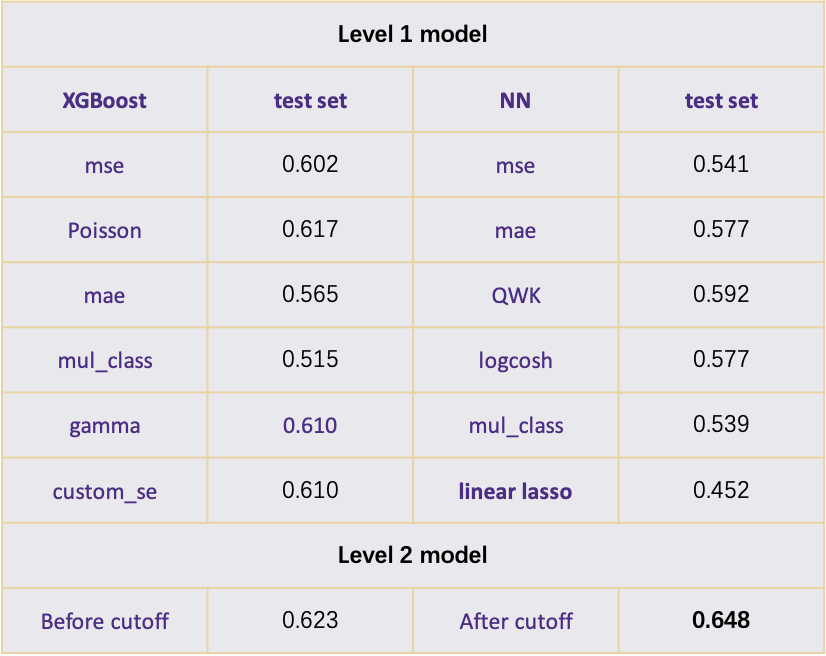

In [187]:
Image("level2_result.png",height=1000, width=500)

The kappa score of test set also confirms that the ensemble modeling and cutoff function can improve the model performance. The kappa score of level 2 model is better than any models in level 1. Finally, the kappa score of the whole model is 0.648, which is a satisfying result. 

The private leaderboard of the competition shows that the kappa score of the first prize is 0.679. Due to the different test set, it is unfair to compare the kappa score of leaderboard and this model directly.   
I used the codes of one open jupyter notebook of this competition from Kaggle [1], the private score of this notebook is 0.66652, which is close to the best model in the competition. I ran this model with my train set, validation set and test set and the kappa score of this model is 0.627. The kappa score of my model is 0.648 so that my model is better.

[1] https://www.kaggle.com/zeroblue/xgboost-with-optimized-offsets

## Conclusions

**Introduction**   
(1) It is a Kaggle competition and the task is to predict the correct insurance product labels.   
(2) Evaluation: quadratic weighted kappa (QWK)   
(3) Labels: 8 ordered classes  
(4) Feature data types: binary, continuous, discrete and category  


**Data Processing**   
(1) Null values: remove, replace (mean/ mode)  
(2) Outliers: replace with mode value (skewed columns)   
(3) Object column: replace with integers   
(4) Category columns: OneHotEncoder  
(5) Feature scaling   
(6) Train set, test set (6000) and validation set (9000)   

**Model Structure**  
(1) Level 1: 6 XGBoost models (only 1 classifier), 5 neural network models (only 1 classifier) and 1 linear model   
(2) Level 2: use the outputs of 12 model in level 1 as the inputs of level 2 model, apply cutoff function    

**Result Analysis**   
(1) The kappa score of test set is **0.648**, which is better than any single models in level 1. Ensembling models work well for the competition.    
(2) The model performance is almost the same as the top solution in the competition.   
(3) The model is overfit. The problem also exists in other solutions of the competition and it is mentioned in the discussion forum of the competition. To achieve a higher kappa score, most models suffer from overfitting problem.   
(4) From the leaderboard of the competition, the difference of kappa score of top 100 models is extremely small. For example, the kappa score of the first prize is 0.67938 and the kappa score of the 100th prize is 0.67332. As the third winner said, luck was a big factor in this competition.    

**Further Improvement**   
(1) In the discussion forum of the competition in Kaggle, some winners achieve great preformance with a simple linear regression or genetic algorithm.  
(2) More model combinations can be tried to find out a better solution.     

## Appendix
## (1) Model with PCA
Perform much worse than the best model.

In [385]:
insurance = pd.read_csv("train.csv")
df = insurance.drop("Id", axis = 1)

catagory_index = ["Product_Info_1", "Product_Info_2", "Product_Info_3", "Product_Info_5", "Product_Info_6", 
                  "Product_Info_7", "Employment_Info_2", "Employment_Info_3", "Employment_Info_5", "InsuredInfo_1", 
                  "InsuredInfo_2", "InsuredInfo_3", "InsuredInfo_4", "InsuredInfo_5", "InsuredInfo_6", 
                  "InsuredInfo_7", "Insurance_History_1", "Insurance_History_2", "Insurance_History_3", 
                  "Insurance_History_4", "Insurance_History_7", "Insurance_History_8", "Insurance_History_9", 
                  "Family_Hist_1", "Medical_History_3", "Medical_History_4", "Medical_History_5", 
                  "Medical_History_6", "Medical_History_7", "Medical_History_8", "Medical_History_9", 
                  "Medical_History_11", "Medical_History_12", "Medical_History_13", "Medical_History_14", 
                  "Medical_History_16", "Medical_History_17", "Medical_History_18", "Medical_History_19", 
                  "Medical_History_20", "Medical_History_21", "Medical_History_22", "Medical_History_23",
                  "Medical_History_25", "Medical_History_26", "Medical_History_27", "Medical_History_28",
                  "Medical_History_29", "Medical_History_30", "Medical_History_31", "Medical_History_33",
                  "Medical_History_34", "Medical_History_35", "Medical_History_36", "Medical_History_37",
                  "Medical_History_38", "Medical_History_39", "Medical_History_40", "Medical_History_41"]

continuous_index = ["Product_Info_4", "Ins_Age", "Ht", "Wt", "BMI", "Employment_Info_1", "Employment_Info_4", 
                    "Employment_Info_6", "Insurance_History_5", "Family_Hist_2", "Family_Hist_3", 
                    "Family_Hist_4", "Family_Hist_5"]

discrete_index = ["Medical_History_1", "Medical_History_2", "Medical_History_10", "Medical_History_15", 
                  "Medical_History_24", "Medical_History_32"]

index1 = df.columns.to_list()
binary_index = index1[78:126]

In [386]:
df = df.drop("Medical_History_10", axis = 1)
df = df.drop("Medical_History_32", axis = 1)
df = df.drop("Medical_History_24", axis = 1)

discrete_index = ["Medical_History_1", "Medical_History_2",  "Medical_History_15"]

df["Medical_History_15"] = df["Medical_History_15"].fillna(df["Medical_History_15"].mean())
df["Family_Hist_5"] = df["Family_Hist_5"].fillna(df["Family_Hist_5"].mean())
df["Family_Hist_3"] = df["Family_Hist_3"].fillna(df["Family_Hist_3"].mean())
df["Family_Hist_2"] = df["Family_Hist_2"].fillna(df["Family_Hist_2"].mean())
df["Insurance_History_5"] = df["Insurance_History_5"].fillna(df["Insurance_History_5"].mean())
df["Family_Hist_4"] = df["Family_Hist_4"].fillna(df["Family_Hist_4"].mean())
df["Employment_Info_6"] = df["Employment_Info_6"].fillna(df["Employment_Info_6"].mean())
df["Medical_History_1"] = df["Medical_History_1"].fillna(df["Medical_History_1"].mean())
df["Employment_Info_1"] = df["Employment_Info_1"].fillna(df["Employment_Info_1"].mean())
df["Medical_History_1"] = df["Medical_History_1"].fillna(df["Medical_History_1"].mean())

df["Employment_Info_4"] = df["Employment_Info_4"].fillna(0.0)

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
Response,0,0.0
Medical_History_9,0,0.0
Family_Hist_1,0,0.0
Family_Hist_2,0,0.0
Family_Hist_3,0,0.0


In [388]:
df["Product_Info_7"][df["Product_Info_7"] == 2] = 1
df["Insurance_History_2"][df["Insurance_History_2"] == 2] = 1
df["Insurance_History_3"][df["Insurance_History_3"] == 2] = 3
df["Medical_History_3"][df["Medical_History_3"] == 1] = 2
df["Medical_History_5"][df["Medical_History_5"] == 3] = 1

df["Medical_History_6"][df["Medical_History_6"] == 2] = 3
df["Medical_History_9"][df["Medical_History_9"] == 3] = 2
df["Medical_History_12"][df["Medical_History_12"] == 1] = 2
df["Medical_History_13"][df["Medical_History_13"] == 2] = 3
df["Medical_History_16"][df["Medical_History_16"] == 2] = 1

df["Medical_History_17"][df["Medical_History_17"] == 1] = 3
df["Medical_History_19"][df["Medical_History_19"] == 3] = 1
df["Medical_History_20"][df["Medical_History_20"] == 3] = 2
df["Medical_History_23"][df["Medical_History_23"] == 2] = 3
df["Medical_History_26"][df["Medical_History_26"] == 1] = 3

df["Medical_History_27"][df["Medical_History_27"] == 2] = 3
df["Medical_History_28"][df["Medical_History_28"] == 3] = 1
df["Medical_History_29"][df["Medical_History_29"] == 2] = 3
df["Medical_History_30"][df["Medical_History_30"] == 1] = 2
df["Medical_History_31"][df["Medical_History_31"] == 2] = 3

df["Medical_History_34"][df["Medical_History_34"] == 2] = 1
df["Medical_History_37"][df["Medical_History_37"] == 3] = 2
df["Medical_History_39"][df["Medical_History_39"] == 2] = 3
df["Medical_History_40"][df["Medical_History_40"] == 2] = 3
df["Medical_History_41"][df["Medical_History_41"] == 2] = 1

df["Medical_History_21"][df["Medical_History_21"] == 3] = 1
df["Medical_History_35"][df["Medical_History_35"] == 2] = 1

df["Product_Info_3"][df["Product_Info_3"] == 1] = 26
df["Product_Info_3"][df["Product_Info_3"] == 27] = 26
df["Product_Info_3"][df["Product_Info_3"] == 24] = 26
df["Product_Info_3"][df["Product_Info_3"] == 22] = 26
df["Product_Info_3"][df["Product_Info_3"] == 20] = 26
df["Product_Info_3"][df["Product_Info_3"] == 19] = 26
df["Product_Info_3"][df["Product_Info_3"] == 18] = 26
df["Product_Info_3"][df["Product_Info_3"] == 5] = 26
df["Product_Info_3"][df["Product_Info_3"] == 16] = 26
df["Product_Info_3"][df["Product_Info_3"] == 13] = 26
df["Product_Info_3"][df["Product_Info_3"] == 38] = 26
df["Product_Info_3"][df["Product_Info_3"] == 32] = 26
df["Product_Info_3"][df["Product_Info_3"] == 12] = 26
df["Product_Info_3"][df["Product_Info_3"] == 3] = 26
df["Product_Info_3"][df["Product_Info_3"] == 34] = 26
df["Product_Info_3"][df["Product_Info_3"] == 6] = 26
df["Product_Info_3"][df["Product_Info_3"] == 17] = 26
df["Product_Info_3"][df["Product_Info_3"] == 2] = 26
df["Product_Info_3"][df["Product_Info_3"] == 33] = 26

df["Employment_Info_2"][df["Employment_Info_2"] == 31] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 29] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 17] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 5] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 28] = 9

df["Employment_Info_2"][df["Employment_Info_2"] == 38] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 22] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 35] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 30] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 18] = 9

df["Employment_Info_2"][df["Employment_Info_2"] == 19] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 33] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 23] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 25] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 26] = 9

df["Employment_Info_2"][df["Employment_Info_2"] == 34] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 21] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 7] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 4] = 9

In [390]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
full_pipeline = ColumnTransformer([("cat", OneHotEncoder(), catagory_index)])
X = full_pipeline.fit_transform(df)

# X: the dataframe of catagory columns
X = pd.DataFrame(X)
#new_index = ["Med_Keywords_Count", "Product_Info_2_char", "Product_Info_2_num", "BMI_Age"]
non_cat_index = binary_index + continuous_index + discrete_index 
# df_non_cat: dataframe with catagory columns
df_non_cat = df[non_cat_index]
df_new = pd.concat([df_non_cat, X], axis=1, sort=False)
df_new.head()

,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,...,175,176,177,178,179,180,181,182,183,184
0,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [392]:
df_new["Response"] = df["Response"]
# separate data into test set, train set (9000) and validation set (6000)
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=9000, random_state=42)
for train_index, test_index in split.split(df_new, df_new["Response"]):
    strat_train_set = df_new.loc[train_index]
    val_set = df_new.loc[test_index]

#val_set = test_set.reset_index()
strat_train_set = strat_train_set.reset_index()

split = StratifiedShuffleSplit(n_splits=1, test_size=6000, random_state=42)
for train_index, test_index in split.split(strat_train_set, strat_train_set["Response"]):
    train_set = strat_train_set.loc[train_index]
    test_set = strat_train_set.loc[test_index]

train_set = train_set.drop("index", axis = 1)
test_set = test_set.drop("index", axis = 1)

y_train = train_set["Response"]
y_val = val_set["Response"]
y_test = test_set["Response"]

X_train = train_set.drop("Response", axis = 1)
X_val = val_set.drop("Response", axis = 1)
X_test = test_set.drop("Response", axis = 1)

In [393]:
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()

standard.fit(X_train)
X_train = pd.DataFrame(standard.transform(X_train), columns = X_train.columns)

standard.fit(X_val)
X_val = pd.DataFrame(standard.transform(X_val), columns = X_val.columns)

standard.fit(X_test)
X_test = pd.DataFrame(standard.transform(X_test), columns = X_test.columns)

In [394]:
## PCA
from sklearn.decomposition import PCA
pca = PCA()

X_train = pca.set_params(n_components=100).fit_transform(X_train)
X_val = pca.set_params(n_components=100).fit_transform(X_val)
X_test = pca.set_params(n_components=100).fit_transform(X_test)

In [395]:
# parameter of sgb
def get_params():
    
    params = {}
    params["objective"] = "reg:squarederror"     
    params["eta"] = 0.1
    params["min_child_weight"] = 300
    params["subsample"] = 0.85
    params["colsample_bytree"] = 0.3
    # params["silent"] = 1
    params["max_depth"] = 7
    plst = list(params.items())

    return plst

xgb_num_rounds = 500
# convert data to xgb data structure
xgtrain = xgb.DMatrix(X_train, y_train)

plst = get_params()

# train model
model_mse = xgb.train(plst, xgtrain, xgb_num_rounds) 

train_preds_mse = model_mse.predict(xgtrain, ntree_limit=model_mse.best_iteration)
xgval = xgb.DMatrix(X_val, y_val)
val_preds_mse = model_mse.predict(xgval, ntree_limit=model_mse.best_iteration)
xgtest = xgb.DMatrix(X_test, y_test)
test_preds_mse = model_mse.predict(xgtest, ntree_limit=model_mse.best_iteration)

In [397]:
train_preds_mse = model_mse.predict(xgtrain, ntree_limit=model_mse.best_iteration)
predClipped = np.clip(np.round(train_preds_NN_mae), 1, 8).astype(int)
(predClipped.reshape((-1)) == y_train).sum() / y_train.shape[0]
cohen_kappa_score(y_train, predClipped.reshape((-1)),weights= "quadratic")

0.6530074639234453

In [401]:
val_preds_mse = model_mse.predict(xgval, ntree_limit=model_mse.best_iteration)
predClipped = np.clip(np.round(val_preds_mse), 1, 8).astype(int)
(predClipped.reshape((-1)) == y_val).sum() / y_val.shape[0]
cohen_kappa_score(y_val, predClipped.reshape((-1)),weights= "quadratic")

0.29159853533104974

In [400]:
xgtest = xgb.DMatrix(X_test, y_test)
test_preds_mse = model_mse.predict(xgtest, ntree_limit=model_mse.best_iteration)
predClipped = np.clip(np.round(test_preds_mse), 1, 8).astype(int)
cohen_kappa_score(y_test, predClipped.reshape((-1)),weights= "quadratic")

0.30420715217240635

From kappa score of the first model, it can be concluded that model with PCA perform much worse than the model without PCA. The model with PCA suffers from extreme overfit problem. The following models have omitted here. 

## (2) Model with new columns
Its performance is similar as the best model.

In [402]:
insurance = pd.read_csv("train.csv")
df = insurance.drop("Id", axis = 1)

catagory_index = ["Product_Info_1", "Product_Info_2", "Product_Info_3", "Product_Info_5", "Product_Info_6", 
                  "Product_Info_7", "Employment_Info_2", "Employment_Info_3", "Employment_Info_5", "InsuredInfo_1", 
                  "InsuredInfo_2", "InsuredInfo_3", "InsuredInfo_4", "InsuredInfo_5", "InsuredInfo_6", 
                  "InsuredInfo_7", "Insurance_History_1", "Insurance_History_2", "Insurance_History_3", 
                  "Insurance_History_4", "Insurance_History_7", "Insurance_History_8", "Insurance_History_9", 
                  "Family_Hist_1", "Medical_History_3", "Medical_History_4", "Medical_History_5", 
                  "Medical_History_6", "Medical_History_7", "Medical_History_8", "Medical_History_9", 
                  "Medical_History_11", "Medical_History_12", "Medical_History_13", "Medical_History_14", 
                  "Medical_History_16", "Medical_History_17", "Medical_History_18", "Medical_History_19", 
                  "Medical_History_20", "Medical_History_21", "Medical_History_22", "Medical_History_23",
                  "Medical_History_25", "Medical_History_26", "Medical_History_27", "Medical_History_28",
                  "Medical_History_29", "Medical_History_30", "Medical_History_31", "Medical_History_33",
                  "Medical_History_34", "Medical_History_35", "Medical_History_36", "Medical_History_37",
                  "Medical_History_38", "Medical_History_39", "Medical_History_40", "Medical_History_41"]

continuous_index = ["Product_Info_4", "Ins_Age", "Ht", "Wt", "BMI", "Employment_Info_1", "Employment_Info_4", 
                    "Employment_Info_6", "Insurance_History_5", "Family_Hist_2", "Family_Hist_3", 
                    "Family_Hist_4", "Family_Hist_5"]

discrete_index = ["Medical_History_1", "Medical_History_2", "Medical_History_10", "Medical_History_15", 
                  "Medical_History_24", "Medical_History_32"]

index1 = df.columns.to_list()
binary_index = index1[78:126]

In [403]:
df = df.drop("Medical_History_10", axis = 1)
df = df.drop("Medical_History_32", axis = 1)
df = df.drop("Medical_History_24", axis = 1)

discrete_index = ["Medical_History_1", "Medical_History_2",  "Medical_History_15"]

df["Medical_History_15"] = df["Medical_History_15"].fillna(df["Medical_History_15"].mean())
df["Family_Hist_5"] = df["Family_Hist_5"].fillna(df["Family_Hist_5"].mean())
df["Family_Hist_3"] = df["Family_Hist_3"].fillna(df["Family_Hist_3"].mean())
df["Family_Hist_2"] = df["Family_Hist_2"].fillna(df["Family_Hist_2"].mean())
df["Insurance_History_5"] = df["Insurance_History_5"].fillna(df["Insurance_History_5"].mean())
df["Family_Hist_4"] = df["Family_Hist_4"].fillna(df["Family_Hist_4"].mean())
df["Employment_Info_6"] = df["Employment_Info_6"].fillna(df["Employment_Info_6"].mean())
df["Medical_History_1"] = df["Medical_History_1"].fillna(df["Medical_History_1"].mean())
df["Employment_Info_1"] = df["Employment_Info_1"].fillna(df["Employment_Info_1"].mean())
df["Medical_History_1"] = df["Medical_History_1"].fillna(df["Medical_History_1"].mean())

df["Employment_Info_4"] = df["Employment_Info_4"].fillna(0.0)

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
Response,0,0.0
Medical_History_9,0,0.0
Family_Hist_1,0,0.0
Family_Hist_2,0,0.0
Family_Hist_3,0,0.0


In [404]:
df["Product_Info_7"][df["Product_Info_7"] == 2] = 1
df["Insurance_History_2"][df["Insurance_History_2"] == 2] = 1
df["Insurance_History_3"][df["Insurance_History_3"] == 2] = 3
df["Medical_History_3"][df["Medical_History_3"] == 1] = 2
df["Medical_History_5"][df["Medical_History_5"] == 3] = 1

df["Medical_History_6"][df["Medical_History_6"] == 2] = 3
df["Medical_History_9"][df["Medical_History_9"] == 3] = 2
df["Medical_History_12"][df["Medical_History_12"] == 1] = 2
df["Medical_History_13"][df["Medical_History_13"] == 2] = 3
df["Medical_History_16"][df["Medical_History_16"] == 2] = 1

df["Medical_History_17"][df["Medical_History_17"] == 1] = 3
df["Medical_History_19"][df["Medical_History_19"] == 3] = 1
df["Medical_History_20"][df["Medical_History_20"] == 3] = 2
df["Medical_History_23"][df["Medical_History_23"] == 2] = 3
df["Medical_History_26"][df["Medical_History_26"] == 1] = 3

df["Medical_History_27"][df["Medical_History_27"] == 2] = 3
df["Medical_History_28"][df["Medical_History_28"] == 3] = 1
df["Medical_History_29"][df["Medical_History_29"] == 2] = 3
df["Medical_History_30"][df["Medical_History_30"] == 1] = 2
df["Medical_History_31"][df["Medical_History_31"] == 2] = 3

df["Medical_History_34"][df["Medical_History_34"] == 2] = 1
df["Medical_History_37"][df["Medical_History_37"] == 3] = 2
df["Medical_History_39"][df["Medical_History_39"] == 2] = 3
df["Medical_History_40"][df["Medical_History_40"] == 2] = 3
df["Medical_History_41"][df["Medical_History_41"] == 2] = 1

df["Medical_History_21"][df["Medical_History_21"] == 3] = 1
df["Medical_History_35"][df["Medical_History_35"] == 2] = 1

df["Product_Info_3"][df["Product_Info_3"] == 1] = 26
df["Product_Info_3"][df["Product_Info_3"] == 27] = 26
df["Product_Info_3"][df["Product_Info_3"] == 24] = 26
df["Product_Info_3"][df["Product_Info_3"] == 22] = 26
df["Product_Info_3"][df["Product_Info_3"] == 20] = 26
df["Product_Info_3"][df["Product_Info_3"] == 19] = 26
df["Product_Info_3"][df["Product_Info_3"] == 18] = 26
df["Product_Info_3"][df["Product_Info_3"] == 5] = 26
df["Product_Info_3"][df["Product_Info_3"] == 16] = 26
df["Product_Info_3"][df["Product_Info_3"] == 13] = 26
df["Product_Info_3"][df["Product_Info_3"] == 38] = 26
df["Product_Info_3"][df["Product_Info_3"] == 32] = 26
df["Product_Info_3"][df["Product_Info_3"] == 12] = 26
df["Product_Info_3"][df["Product_Info_3"] == 3] = 26
df["Product_Info_3"][df["Product_Info_3"] == 34] = 26
df["Product_Info_3"][df["Product_Info_3"] == 6] = 26
df["Product_Info_3"][df["Product_Info_3"] == 17] = 26
df["Product_Info_3"][df["Product_Info_3"] == 2] = 26
df["Product_Info_3"][df["Product_Info_3"] == 33] = 26

df["Employment_Info_2"][df["Employment_Info_2"] == 31] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 29] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 17] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 5] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 28] = 9

df["Employment_Info_2"][df["Employment_Info_2"] == 38] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 22] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 35] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 30] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 18] = 9

df["Employment_Info_2"][df["Employment_Info_2"] == 19] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 33] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 23] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 25] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 26] = 9

df["Employment_Info_2"][df["Employment_Info_2"] == 34] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 21] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 7] = 9
df["Employment_Info_2"][df["Employment_Info_2"] == 4] = 9

In [405]:
# # 
med_keyword_columns = df.columns[df.columns.str.startswith('Medical_Keyword_')]
df['Med_Keywords_Count'] = df[med_keyword_columns].sum(axis=1)
# # 
df['Product_Info_2_char'] = df.Product_Info_2.str[0]
df['Product_Info_2_num'] = df.Product_Info_2.str[1]
df['Product_Info_2_char'] = pd.factorize(df['Product_Info_2_char'])[0]
df['Product_Info_2_num'] = pd.factorize(df['Product_Info_2_num'])[0]
# # 
df['BMI_Age'] = df['BMI'] * df['Ins_Age']

In [406]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
full_pipeline = ColumnTransformer([("cat", OneHotEncoder(), catagory_index)])
X = full_pipeline.fit_transform(df)

# X: the dataframe of catagory columns
X = pd.DataFrame(X)
new_index = ["Med_Keywords_Count", "Product_Info_2_char", "Product_Info_2_num", "BMI_Age"]
non_cat_index = binary_index + continuous_index + discrete_index + new_index
# df_non_cat: dataframe with catagory columns
df_non_cat = df[non_cat_index]
df_new = pd.concat([df_non_cat, X], axis=1, sort=False)
df_new.head()

,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,...,175,176,177,178,179,180,181,182,183,184
0,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [408]:
df_new["Response"] = df["Response"]
# separate data into test set, train set (9000) and validation set (6000)
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=9000, random_state=42)
for train_index, test_index in split.split(df_new, df_new["Response"]):
    strat_train_set = df_new.loc[train_index]
    val_set = df_new.loc[test_index]

#val_set = test_set.reset_index()
strat_train_set = strat_train_set.reset_index()

split = StratifiedShuffleSplit(n_splits=1, test_size=6000, random_state=42)
for train_index, test_index in split.split(strat_train_set, strat_train_set["Response"]):
    train_set = strat_train_set.loc[train_index]
    test_set = strat_train_set.loc[test_index]

train_set = train_set.drop("index", axis = 1)
test_set = test_set.drop("index", axis = 1)

In [409]:
y_train = train_set["Response"]
y_val = val_set["Response"]
y_test = test_set["Response"]

X_train = train_set.drop("Response", axis = 1)
X_val = val_set.drop("Response", axis = 1)
X_test = test_set.drop("Response", axis = 1)

In [410]:
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()

standard.fit(X_train)
X_train = pd.DataFrame(standard.transform(X_train), columns = X_train.columns)

standard.fit(X_val)
X_val = pd.DataFrame(standard.transform(X_val), columns = X_val.columns)

standard.fit(X_test)
X_test = pd.DataFrame(standard.transform(X_test), columns = X_test.columns)

**Model**

In [411]:
# parameter of sgb
def get_params():
    
    params = {}
    params["objective"] = "reg:squarederror"     
    params["eta"] = 0.1
    params["min_child_weight"] = 300
    params["subsample"] = 0.85
    params["colsample_bytree"] = 0.3
    # params["silent"] = 1
    params["max_depth"] = 7
    plst = list(params.items())

    return plst

xgb_num_rounds = 500
# convert data to xgb data structure
xgtrain = xgb.DMatrix(X_train, y_train)

plst = get_params()

# train model
model_mse = xgb.train(plst, xgtrain, xgb_num_rounds) 

In [412]:
train_preds_mse = model_mse.predict(xgtrain, ntree_limit=model_mse.best_iteration)
predClipped = np.clip(np.round(train_preds_mse), 1, 8).astype(int)
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_train, predClipped.reshape((-1)),weights= "quadratic")

0.6695981327317819

In [413]:
xgval = xgb.DMatrix(X_val, y_val)
val_preds_mse = model_mse.predict(xgval, ntree_limit=model_mse.best_iteration)

predClipped = np.clip(np.round(val_preds_mse), 1, 8).astype(int)
(predClipped.reshape((-1)) == y_val).sum() / y_val.shape[0]

0.31333333333333335

In [414]:
# val set score
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_val, predClipped.reshape((-1)),weights= "quadratic")

0.598417245597332

In [415]:
xgtest = xgb.DMatrix(X_test, y_test)
test_preds_mse = model_mse.predict(xgtest, ntree_limit=model_mse.best_iteration)

predClipped = np.clip(np.round(test_preds_mse), 1, 8).astype(int)
(predClipped.reshape((-1)) == y_test).sum() / y_test.shape[0]

0.2911666666666667

In [416]:
def get_params():
    
    params = {}
    params["objective"] = "count:poisson"     
    params["eta"] = 0.1
    params["min_child_weight"] = 360
    params["subsample"] = 0.85
    params["colsample_bytree"] = 0.3
    params["max_depth"] = 7
    plst = list(params.items())

    return plst
xgb_num_rounds = 500

plst = get_params()
model_possion = xgb.train(plst, xgtrain, xgb_num_rounds)

In [417]:
train_preds_possion = model_possion.predict(xgtrain, ntree_limit=model_possion.best_iteration)
predClipped = np.clip(np.round(train_preds_possion), 1, 8).astype(int)
cohen_kappa_score(y_train, predClipped.reshape((-1)),weights= "quadratic")

0.6937171406890346

In [418]:
xgval = xgb.DMatrix(X_val, y_val)
val_preds_possion = model_possion.predict(xgval, ntree_limit=model_mse.best_iteration)

predClipped = np.clip(np.round(val_preds_possion), 1, 8).astype(int)
(predClipped.reshape((-1)) == y_val).sum() / y_val.shape[0]
cohen_kappa_score(y_val, predClipped.reshape((-1)),weights= "quadratic")

0.6132359674261945

In [419]:
xgtest = xgb.DMatrix(X_test, y_test)
test_preds_possion = model_possion.predict(xgtest, ntree_limit=model_possion.best_iteration)

predClipped = np.clip(np.round(test_preds_possion), 1, 8).astype(int)
cohen_kappa_score(y_test, predClipped.reshape((-1)),weights= "quadratic")

0.6173619735472139

In [420]:
import tensorflow as tf
from tensorflow import keras

def reset_session(seed = 42):
    tf.random.set_seed(seed)
    np.random.seed(seed)
    tf.keras.backend.clear_session()
    
shape = X_train.shape[1]
reset_session()

model = keras.models.Sequential()
model.add(keras.layers.Dense(300, activation = "relu", input_shape = (shape,), kernel_initializer="he_normal"))



for n_hidden in (300, 300, 300, 100):
    model.add(keras.layers.Dense(n_hidden, activation = "relu", kernel_initializer = "he_normal"))
    keras.layers.BatchNormalization()
    model.add(keras.layers.Dropout(rate=0.2))
    
model.add(keras.layers.Dense(1, kernel_initializer="he_normal"))
optimizer = keras.optimizers.Adam(lr = 0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss = "mse", optimizer = optimizer)
#checkpoint_cb = keras.callbacks.ModelCheckpoint("bestsave.h5", save_best_only=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("autosave.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,min_delta=0.001, restore_best_weights=True)

model.fit(X_train, y_train, epochs = 100, validation_data=(X_val, y_val),
          batch_size = 32, verbose = 1, callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
1387/1387 [==============================] - 6s 4ms/step - loss: 5.1533 - val_loss: 4.7032
Epoch 2/100
1387/1387 [==============================] - 6s 5ms/step - loss: 4.2138 - val_loss: 4.3308
Epoch 3/100
1387/1387 [==============================] - 6s 5ms/step - loss: 3.9120 - val_loss: 3.7360
Epoch 4/100
1387/1387 [==============================] - 7s 5ms/step - loss: 3.6899 - val_loss: 4.2373
Epoch 5/100
1387/1387 [==============================] - 6s 5ms/step - loss: 3.5619 - val_loss: 3.7692
Epoch 6/100
1387/1387 [==============================] - 6s 5ms/step - loss: 3.4367 - val_loss: 3.7596
Epoch 7/100
1387/1387 [==============================] - 6s 4ms/step - loss: 3.3328 - val_loss: 3.9046
Epoch 8/100
1387/1387 [==============================] - 6s 4ms/step - loss: 3.2182 - val_loss: 4.0769
Epoch 9/100
1387/1387 [==============================] - 6s 4ms/step - loss: 3.0947 - val_loss: 3.7874
Epoch 10/100
1387/1387 [==============================] - 6s 4ms/step - l

In [421]:
train_preds_NN_mse = model.predict(X_train)
predClipped = np.clip(np.round(train_preds_NN_mse), 1, 8).astype(int)
(predClipped.reshape((-1)) == y_train).sum() / y_train.shape[0]
cohen_kappa_score(y_train, predClipped.reshape((-1)),weights= "quadratic")

0.5922049505723529

In [422]:
val_preds_NN_mse = model.predict(X_val)
predClipped = np.clip(np.round(val_preds_NN_mse), 1, 8).astype(int)
(predClipped.reshape((-1)) == y_val).sum() / y_val.shape[0]
cohen_kappa_score(y_val, predClipped.reshape((-1)),weights= "quadratic")

0.5407220656936309

In [423]:
test_preds_NN_mse = model.predict(X_test)
predClipped = np.clip(np.round(test_preds_NN_mse), 1, 8).astype(int)
(predClipped.reshape((-1)) == y_test).sum() / y_test.shape[0]
cohen_kappa_score(y_test, predClipped.reshape((-1)),weights= "quadratic")

0.5362967309370859

Here I only show 2 XGBoost models and 1 neural network model (Level 1 model) to show the effect of adding new columns. Compared with the same model without new columns, the kappa score are almost the same. In general, the model does not have significant performance with new columns. The following codes of other models are exactly the same so they are omitted here. The kappa score (final result) of the test set of the model with new columns is 0.641, which almost the same as the model without new columns.